In [ ]:
'''To classify / predict whether an employee continues with the company or not!
To draw insights about employee performance as well as employee retention/departure
from the employee data!'''








In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from tqdm import tqdm #Helps in expicit program 
from sklearn.preprocessing import LabelEncoder # Label Encoding refers to converting the labels into a numeric form
from datetime import datetime

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv(r'/content/drive/MyDrive/Data.csv')

In [ ]:
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [ ]:
data.shape

(1470, 35)

In [ ]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

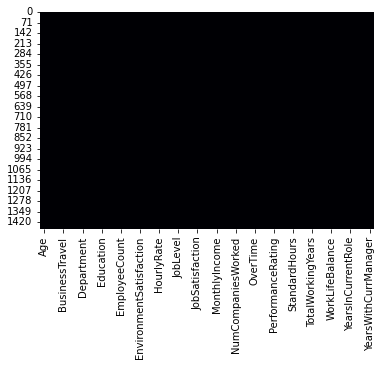

In [ ]:
sns.heatmap(data.isnull(),cmap = 'magma',cbar = False);

In [ ]:
#No null values in data

In [ ]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,...,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00
mean,36.92,802.49,9.19,2.91,1.00,1024.87,2.72,65.89,2.73,2.06,...,2.71,80.00,0.79,11.28,2.80,2.76,7.01,4.23,2.19,4.12
std,9.14,403.51,8.11,1.02,0.00,602.02,1.09,20.33,0.71,1.11,...,1.08,0.00,0.85,7.78,1.29,0.71,6.13,3.62,3.22,3.57
min,18.00,102.00,1.00,1.00,1.00,1.00,1.00,30.00,1.00,1.00,...,1.00,80.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
25%,30.00,465.00,2.00,2.00,1.00,491.25,2.00,48.00,2.00,1.00,...,2.00,80.00,0.00,6.00,2.00,2.00,3.00,2.00,0.00,2.00
50%,36.00,802.00,7.00,3.00,1.00,1020.50,3.00,66.00,3.00,2.00,...,3.00,80.00,1.00,10.00,3.00,3.00,5.00,3.00,1.00,3.00
75%,43.00,1157.00,14.00,4.00,1.00,1555.75,4.00,83.75,3.00,3.00,...,4.00,80.00,1.00,15.00,3.00,3.00,9.00,7.00,3.00,7.00
max,60.00,1499.00,29.00,5.00,1.00,2068.00,4.00,100.00,4.00,5.00,...,4.00,80.00,3.00,40.00,6.00,4.00,40.00,18.00,15.00,17.00


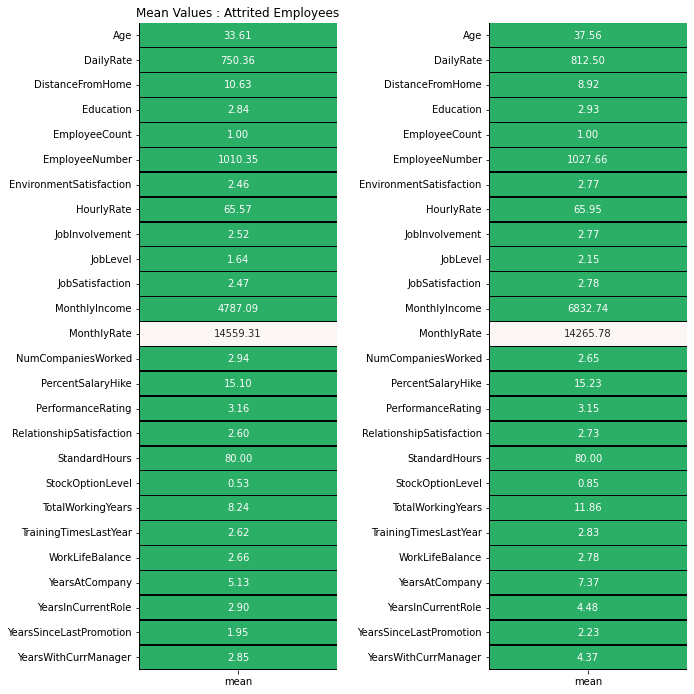

In [ ]:
yes = data[data['Attrition']=='Yes'].describe().T
no = data[data['Attrition']=='No'].describe().T

colors = ['#2BAE66','#FCF6F5']

fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(10,10))
plt.subplot(1,2,1)
sns.heatmap(yes[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt='.2f')
plt.title('Mean Values : Attrited Employees');

plt.subplot(1,2,2)
sns.heatmap(no[['mean']],annot = True,cmap=colors,linewidths=0.4,linecolor='black',cbar=False,fmt='.2f')
fig.tight_layout(pad = 2)

In [ ]:
'''Mean values of all the features for cases of Attrited Employees and Retained Employees.
When considering age, mean values of staying employees is 37.56 i.e more than the departing
employess, 33.61.
Similarly, DailyRate & JobLevel is higher for staying employees than departing employees.
Staying employees have higher values for features : TotalWorkingYears, YearsAtCompany,
YearsInCurrentRole & YearsWithCurrManager'''

In [ ]:
#Dividing features into Numerical and Categorical :

In [ ]:
discrete_features = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
                 'PercentSalaryHike', 'StandardHours', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 
                 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
categorical_features = ['Attrition', 'BusinessTravel','Department', 'Education', 'EducationField', 'EmployeeCount','EmployeeNumber',
                    'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
                    'MaritalStatus', 'Over18', 'OverTime', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
                    'WorkLifeBalance']

df1 = data.copy(deep = True)

In [ ]:
'''According to the dataset information, we divide the features into categorical and discrete features.
Typical approach for this division of features can also be based on the datatypes of the elements of the respective attribute.

Eg : datatype = integer, attribute = numerical feature ; datatype = string, attribute = categorical feature

Creating a deep copy of the orginal dataset for experimenting with data, visualization and modeling.
Modifications in the original dataset will not be highlighted in this deep copy.
We now LabelEncode the categorical features with text data.'''

'According to the dataset information, we divide the features into categorical and discrete features.\nTypical approach for this division of features can also be based on the datatypes of the elements of the respective attribute.\n\nEg : datatype = integer, attribute = numerical feature ; datatype = string, attribute = categorical feature\n\nCreating a deep copy of the orginal dataset for experimenting with data, visualization and modeling.\nModifications in the original dataset will not be highlighted in this deep copy.\nWe now LabelEncode the categorical features with text data.'

In [ ]:
le = LabelEncoder()
l1 = []; l2 = []; text_categorical_features = []
print('Label Encoder Transformation')
for i in tqdm(categorical_features):
    if type(df1[i][0]) == str:
        text_categorical_features.append(i)
        df1[i] = le.fit_transform(df1[i])
        l1.append(list(df1[i].unique())); l2.append(list(le.inverse_transform(df1[i].unique())))
        print(i,' : ',df1[i].unique(),' = ',le.inverse_transform(df1[i].unique()))

Label Encoder Transformation


100%|██████████| 20/20 [00:00<00:00, 410.80it/s]

Attrition  :  [1 0]  =  ['Yes' 'No']
BusinessTravel  :  [2 1 0]  =  ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department  :  [2 1 0]  =  ['Sales' 'Research & Development' 'Human Resources']
EducationField  :  [1 4 3 2 5 0]  =  ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender  :  [0 1]  =  ['Female' 'Male']
JobRole  :  [7 6 2 4 0 3 8 5 1]  =  ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
MaritalStatus  :  [2 1 0]  =  ['Single' 'Married' 'Divorced']
Over18  :  [0]  =  ['Y']
OverTime  :  [1 0]  =  ['Yes' 'No']


In [ ]:
'''We store the label encoded transformations inside a dictionary that gives us the
information about the encoded value and it's original value!'''

"We store the label encoded transformations inside a dictionary that gives us the\ninformation about the encoded value and it's original value!"

In [ ]:
tf1 = {}
for i in range(len(text_categorical_features)):
    tf1[text_categorical_features[i]] = {}
    for j,k in zip(l1[i],l2[i]):
        tf1[text_categorical_features[i]][j] = k

In [ ]:
# Categorical Features :
# Distribution of Categorical Features :

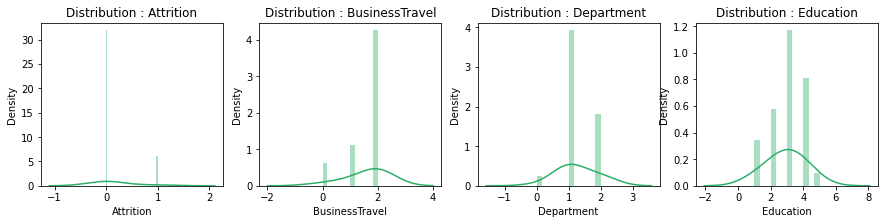

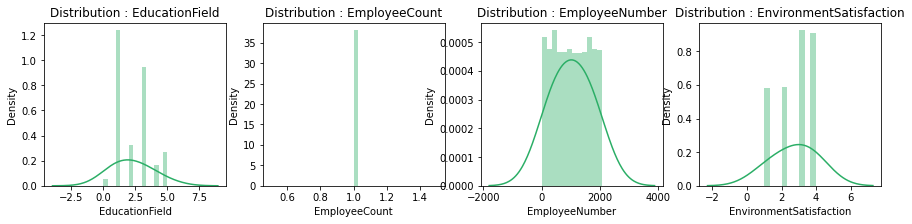

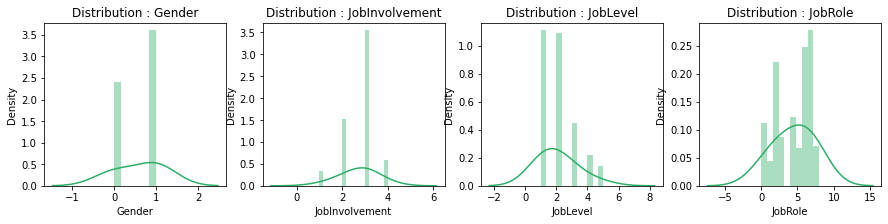

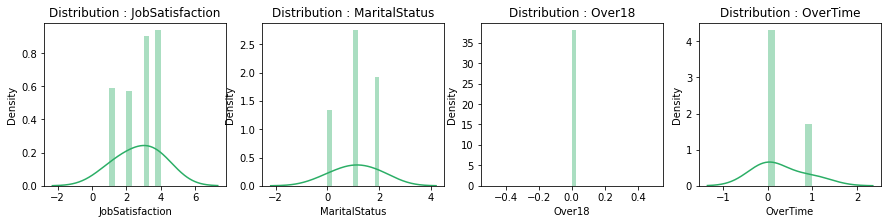

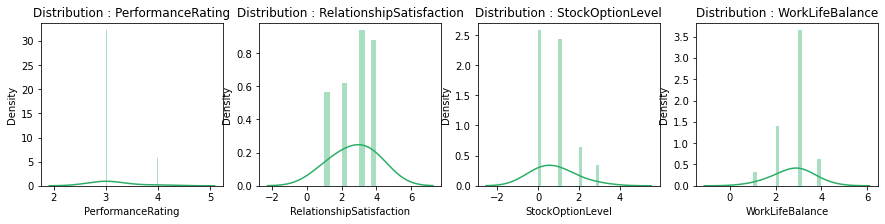

In [ ]:
for i in range(5):
    fig, ax = plt.subplots(nrows = 1,ncols = 4,figsize = (15,3))
    a = 1
    for j in categorical_features[(i*4) : (i*4) + 4]:
        plt.subplot(1,4,a) 
        sns.distplot(df1[j],kde_kws = {'bw' : 1},color = colors[0]);
        plt.title('Distribution : ' + j)
        a += 1

In [ ]:
'''EmployeeNumber is a just a unique identifying number with no repetitive elements. Hence, we will drop this feature.
A bimodal distribution can be observed for JobRole.
A lot of features have slight rightly & leftly skewed data distribution.
Over18 & EmployeeCount are single value features.
We now drop the redundant features from the dataframe as well as from the list of categorical features. We also drop the Attrition feature as it is the target variable & will consider it separately.'''

'EmployeeNumber is a just a unique identifying number with no repetitive elements. Hence, we will drop this feature.\nA bimodal distribution can be observed for JobRole.\nA lot of features have slight rightly & leftly skewed data distribution.\nOver18 & EmployeeCount are single value features.\nWe now drop the redundant features from the dataframe as well as from the list of categorical features. We also drop the Attrition feature as it is the target variable & will consider it separately.'

In [ ]:
df1.drop(columns = ['EmployeeCount', 'EmployeeNumber', 'Over18'], inplace = True)
categorical_features.remove('EmployeeCount'); categorical_features.remove('EmployeeNumber') 
categorical_features.remove('Over18'); categorical_features.remove('Attrition')

In [ ]:
#Discrete Features :
#Distribution of Discrete Features :

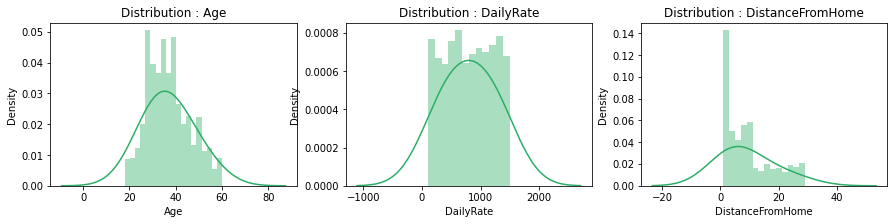

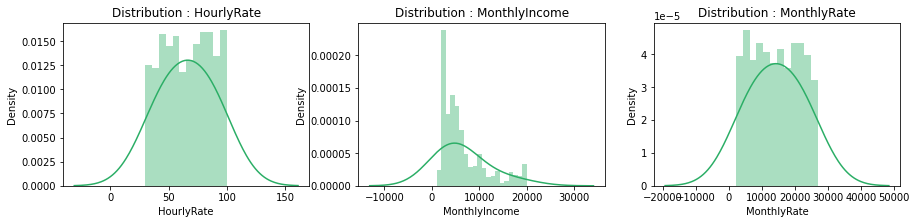

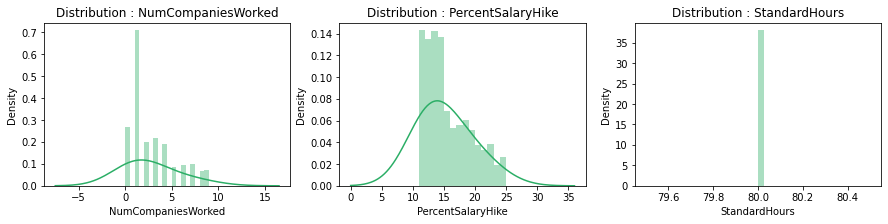

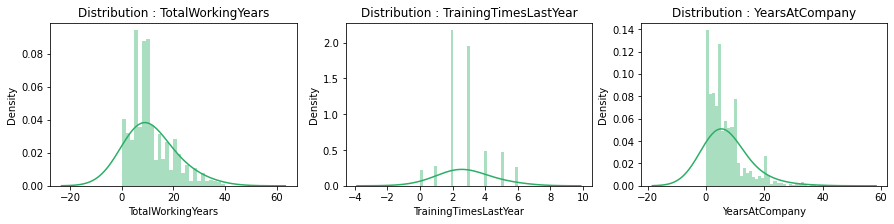

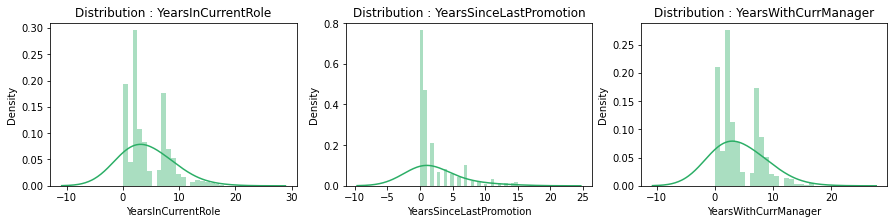

In [ ]:
for i in range(5):
    fig, ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,3))
    a = 1
    for j in discrete_features[(i*3) : (i*3) + 3]:
        plt.subplot(1,3,a) 
        sns.distplot(df1[j],kde_kws = {'bw' : 1},color = colors[0]);
        plt.title('Distribution : ' + j)
        a += 1

In [ ]:
'''HourlyRate, DailyRate & MonthlyRate display graphs that are usually found in Time Series. These graphs display values w.r.t time.
DistanceFromHome, MonthlyIncome, NumCompaniesWorked, PercentSalaryHike, TotalWorkingYears, YearsAtCompany & YearsSinceLastPromotion display a rightly-skewed data distribution.
YearsInCurrentRole & YearsWithCurrManager have a bimodal data distribution. StandardHours is a single value feature.
We now drop the redundant features from the dataframe as well as from the list of discrete features.'''

'HourlyRate, DailyRate & MonthlyRate display graphs that are usually found in Time Series. These graphs display values w.r.t time.\nDistanceFromHome, MonthlyIncome, NumCompaniesWorked, PercentSalaryHike, TotalWorkingYears, YearsAtCompany & YearsSinceLastPromotion display a rightly-skewed data distribution.\nYearsInCurrentRole & YearsWithCurrManager have a bimodal data distribution. StandardHours is a single value feature.\nWe now drop the redundant features from the dataframe as well as from the list of discrete features.'

In [ ]:
df1.drop(columns = ['StandardHours'], inplace = True)
discrete_features.remove('StandardHours')

In [ ]:
#Target Variable Visualization (Attrition) :

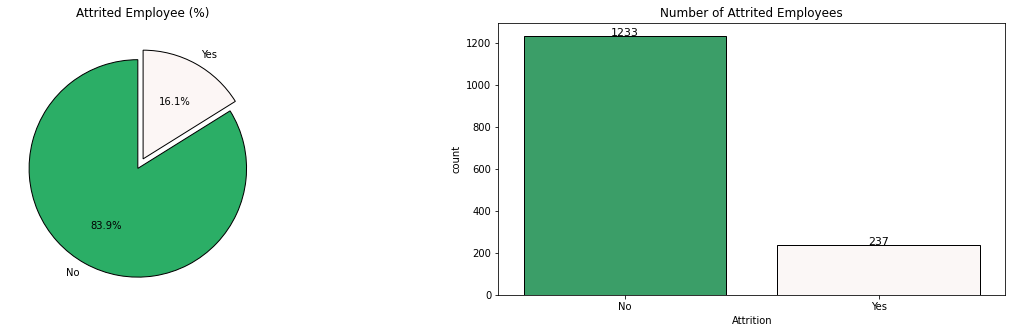

In [ ]:
l = list(df1['Attrition'].value_counts())
circle = [l[0] / sum(l) * 100,l[1] / sum(l) * 100]

fig = plt.subplots(nrows = 1,ncols = 2,figsize = (20,5))
plt.subplot(1,2,1)
plt.pie(circle,labels = list(tf1['Attrition'][j] for j in sorted(df1['Attrition'].unique())),autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Attrited Employee (%)');

plt.subplot(1,2,2)
ax = sns.countplot('Attrition',data = df1, palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
ax.set_xticklabels(tf1['Attrition'][j] for j in sorted(df1['Attrition'].unique()))
plt.title('Number of Attrited Employees');
plt.show()


In [ ]:
'''The dataset is highly unbalanced!
5.2 : 1 ratio for Retained Employees : Attrited Employee is found!
Due to this, predictions will be biased towards Retention cases.
Visualizations will also display this bias, thus making it difficult to gain insight.
After dropping the single value features and removing the target feature, Attrition, we group the remaining 30 features according to their characteristics & by intuition.
They are divided into 5 groups as follows :
General Employee Information :
Employee - Job Information
Employe - Company Information
Company Features
Finances'''

'The dataset is highly unbalanced!\n5.2 : 1 ratio for Retained Employees : Attrited Employee is found!\nDue to this, predictions will be biased towards Retention cases.\nVisualizations will also display this bias, thus making it difficult to gain insight.\nAfter dropping the single value features and removing the target feature, Attrition, we group the remaining 30 features according to their characteristics & by intuition.\nThey are divided into 5 groups as follows :\nGeneral Employee Information :\nEmployee - Job Information\nEmploye - Company Information\nCompany Features\nFinances'

In [ ]:
l1 = ['Age', 'Gender','MaritalStatus', 'Education', 
      'DistanceFromHome', 'TotalWorkingYears', 'NumCompaniesWorked'] # General Employee Information

l2 = ['EducationField', 'Department', 'JobLevel', 'JobRole', 
      'JobInvolvement', 'OverTime', 'JobSatisfaction'] # Employee Job Information

l3 = ['YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager', 
      'YearsSinceLastPromotion', 'TrainingTimesLastYear', 'WorkLifeBalance'] # Employee - Company Information

l4 = ['PercentSalaryHike', 'StockOptionLevel', 'BusinessTravel', 
      'PerformanceRating', 'EnvironmentSatisfaction', 'RelationshipSatisfaction'] # Company Information 

l5 = ['MonthlyIncome', 'HourlyRate', 'DailyRate', 'MonthlyRate'] # Finances

df2 = pd.DataFrame()
df2['Attrition'] = df1['Attrition']


In [ ]:
'''We create a dummy dataframe with the Attrition feature that can be used for storing features that need to be manipulated for drawing insights visualization purposes!
We will draw insights from the group of features by visualization techniques!
General Employee Information :
It includes features that provide information about the basic information of an employee!

List of Features :

Age
Gender
MaritalStatus
Education
DistanceFromHome
TotalWorkingYears
NumCompaniesWorked'''

'We create a dummy dataframe with the Attrition feature that can be used for storing features that need to be manipulated for drawing insights visualization purposes!\nWe will draw insights from the group of features by visualization techniques!\nGeneral Employee Information :\nIt includes features that provide information about the basic information of an employee!\n\nList of Features :\n\nAge\nGender\nMaritalStatus\nEducation\nDistanceFromHome\nTotalWorkingYears\nNumCompaniesWorked'

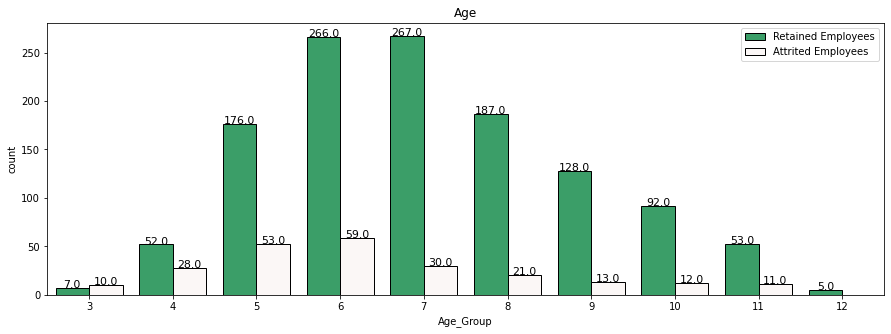

In [ ]:
df2['Age_Group'] = [int(i/5) for i in df1['Age']]

plt.figure(figsize = (15,5))
ax = sns.countplot('Age_Group', data = df2, hue = 'Attrition', palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height(), rect.get_height(), horizontalalignment='center', fontsize = 11)
plt.legend(['Retained Employees', 'Attrited Employees'], loc = 'upper right')
plt.title('Age');

In [ ]:
'''Attrition is present in near about all the age groups.
For Age values between 30 - 34, highest number of employees, 59, have departed. Employees with Age values 25 - 29 come second with 53 employees discontinuing their jobs with the company.
Age values from 20 - 24 & 35 - 40 near about display the same number of attrited employees with 28 & 30 respectively.
Employees above the age of 40 have also been relieved of their duties.'''

'Attrition is present in near about all the age groups.\nFor Age values between 30 - 34, highest number of employees, 59, have departed. Employees with Age values 25 - 29 come second with 53 employees discontinuing their jobs with the company.\nAge values from 20 - 24 & 35 - 40 near about display the same number of attrited employees with 28 & 30 respectively.\nEmployees above the age of 40 have also been relieved of their duties.'

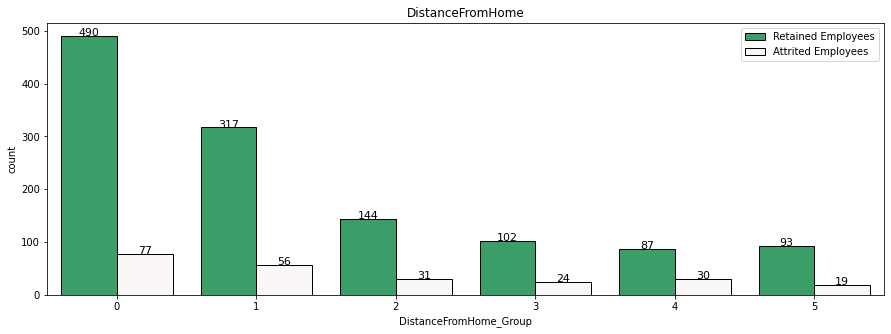

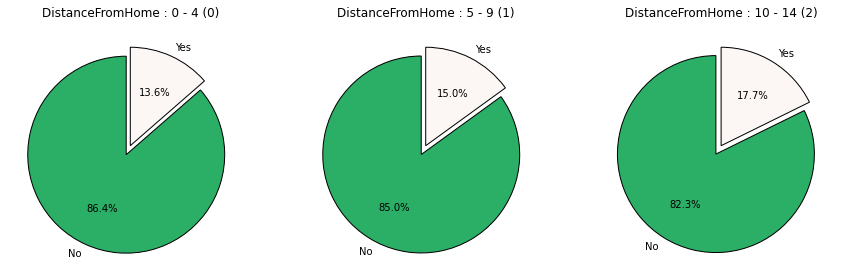

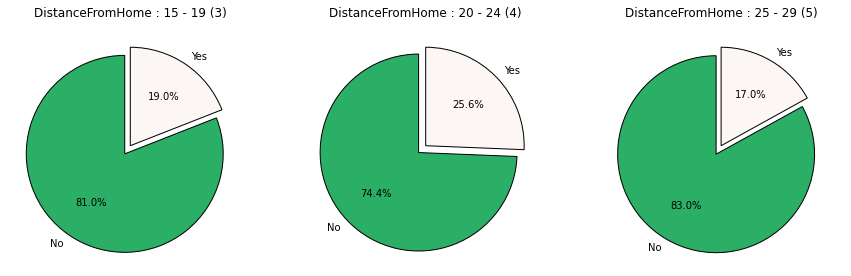

In [ ]:
df2['DistanceFromHome_Group'] = [int(i/5) for i in df1['DistanceFromHome']]

plt.figure(figsize = (15,5))
ax = sns.countplot('DistanceFromHome_Group', data = df2, hue = 'Attrition', palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height(), rect.get_height(), horizontalalignment='center', fontsize = 11)
plt.legend(['Retained Employees', 'Attrited Employees'], loc = 'upper right'); plt.title('DistanceFromHome');

for i in range(2):
    fig = plt.subplots(nrows = 1,ncols = 3,figsize = (15,15)); a = 1
    for j in range(3):
        plt.subplot(1,3,a)
        if i == 0:
            l = list(df2.loc[(df2['DistanceFromHome_Group'] == j)]['Attrition'].value_counts())
        else:
          l = list(df2.loc[(df2['DistanceFromHome_Group'] == (j+3))]['Attrition'].value_counts())
            
        circle = [l[0] / sum(l) * 100,l[1] / sum(l) * 100]
        plt.pie(circle,labels = list(tf1['Attrition'][k] for k in sorted(df2['Attrition'].unique())),autopct = '%1.1f%%',startangle = 90,explode = (0.1,0),
                colors = colors, wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
        if i == 0:
            plt.title('DistanceFromHome : ' + str(j*5) + ' - ' + str(j*5 + 4) + ' ('+ str(j) + ')');
        else:
            plt.title('DistanceFromHome : ' + str((j+3)*5) + ' - ' + str((j+3)*5 + 4) + ' ('+ str(j+3) + ')');
        a += 1


In [ ]:
'''From the 1st graph, we can say that employees living nearest to the company i.e within 0 - 4, they have been attrited the most, however when we check the percentage of attrition, it tells us a different story.
Employees living within the distance of 0 - 4 have been attrited the least. As the value of DistanceFromHome increases, employee attrition increases!'''

'From the 1st graph, we can say that employees living nearest to the company i.e within 0 - 4, they have been attrited the most, however when we check the percentage of attrition, it tells us a different story.\nEmployees living within the distance of 0 - 4 have been attrited the least. As the value of DistanceFromHome increases, employee attrition increases!'

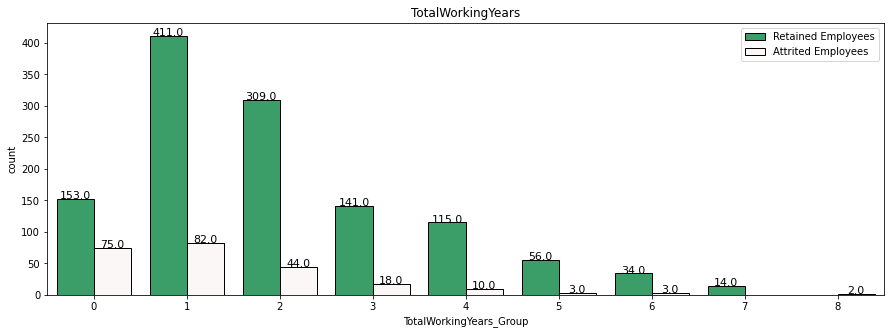

In [ ]:
df2['TotalWorkingYears_Group'] = [int(i/5) for i in df1['TotalWorkingYears']]

plt.figure(figsize = (15,5))
ax = sns.countplot('TotalWorkingYears_Group', data = df2, hue = 'Attrition', palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height(), rect.get_height(), horizontalalignment='center', fontsize = 11)
plt.legend(['Retained Employees', 'Attrited Employees'], loc = 'upper right')
plt.title('TotalWorkingYears');

In [ ]:
'''From the above visualization, we can say that employees within their 1st 10 years of work experience are highly prone to being removed!
As the work experience increases, chances of attrition reduces!'''

'From the above visualization, we can say that employees within their 1st 10 years of work experience are highly prone to being removed!\nAs the work experience increases, chances of attrition reduces!'

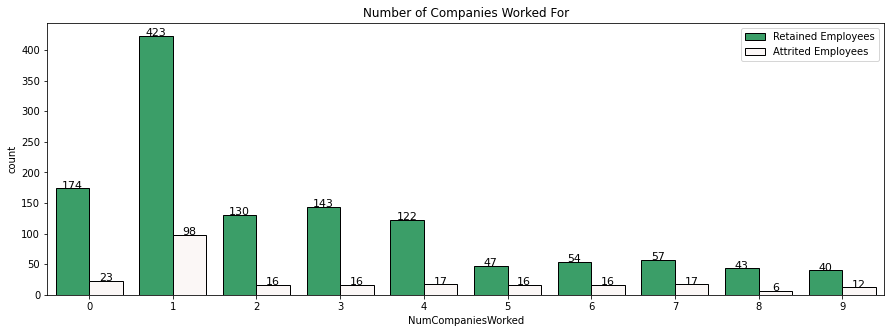

In [ ]:
plt.figure(figsize = (15,5))
ax = sns.countplot('NumCompaniesWorked', data = df1, hue = 'Attrition', palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height(), rect.get_height(), horizontalalignment='center', fontsize = 11)
plt.legend(['Retained Employees', 'Attrited Employees'], loc = 'upper right')
plt.title('Number of Companies Worked For');

In [ ]:
'''We can clearly see that a lot of the volatility can be seen between 1st - 2nd job.
This volatility gets calmed down after the 2nd job.
However, as the employee works in more than 4 companies, chances of attrition increase drastically.'''

'We can clearly see that a lot of the volatility can be seen between 1st - 2nd job.\nThis volatility gets calmed down after the 2nd job.\nHowever, as the employee works in more than 4 companies, chances of attrition increase drastically.'

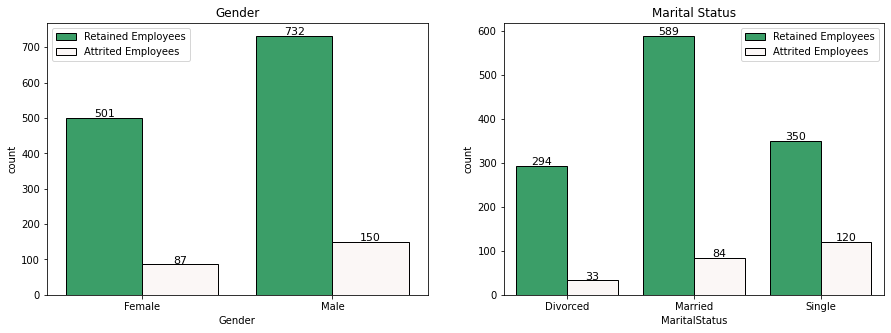

In [ ]:
fig = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

plt.subplot(1,2,1)
ax = sns.countplot('Gender',data = df1, hue = 'Attrition', palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
ax.set_xticklabels(tf1['Gender'][j] for j in sorted(df1['Gender'].unique()))
plt.legend(['Retained Employees', 'Attrited Employees'])
plt.title('Gender');

plt.subplot(1,2,2)
ax = sns.countplot('MaritalStatus',data = df1, hue = 'Attrition', palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
ax.set_xticklabels(tf1['MaritalStatus'][j] for j in sorted(df1['MaritalStatus'].unique()))
plt.legend(['Retained Employees', 'Attrited Employees'])
plt.title('Marital Status');

In [ ]:
'''According to the data, more Male employees have been removed than the Female employees.
Single employees have been attrited the most. Married employees occupy the 2nd place and Divorced come at the last position.'''

'According to the data, more Male employees have been removed than the Female employees.\nSingle employees have been attrited the most. Married employees occupy the 2nd place and Divorced come at the last position.'

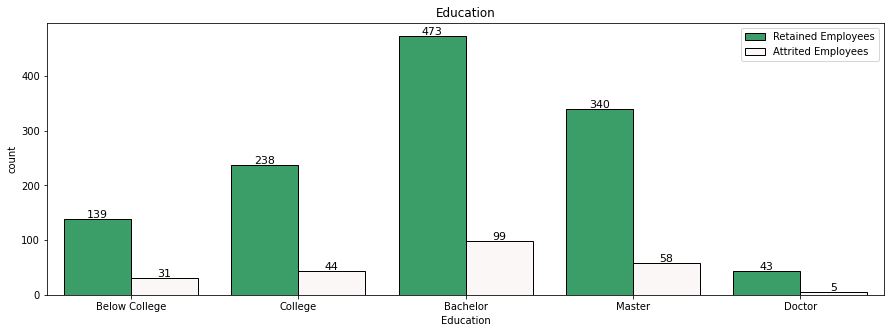

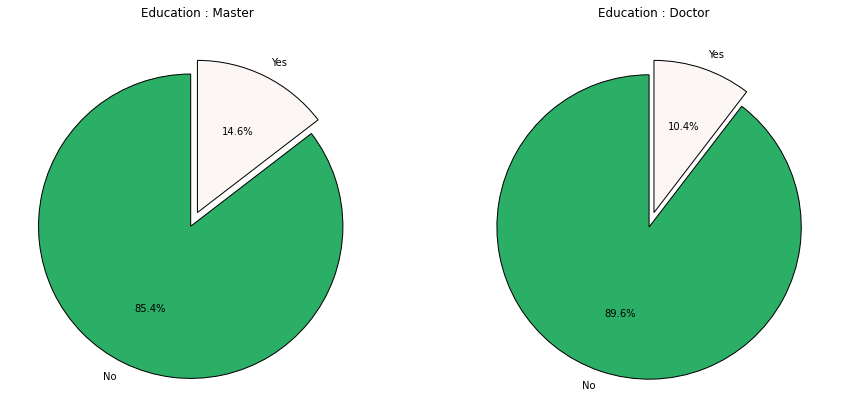

In [ ]:
plt.figure(figsize = (15,5))
ax = sns.countplot('Education',data = df1, hue = 'Attrition', palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
ax.set_xticklabels(['Below College', 'College', 'Bachelor', 'Master', 'Doctor'])
plt.legend(['Retained Employees', 'Attrited Employees'])
plt.title('Education');

fig = plt.subplots(nrows = 1,ncols = 3,figsize = (15,15))
for i in range(1,4):
    plt.subplot(1,3,i)
    l = list(df2.loc[(df1['Education'] == i)]['Attrition'].value_counts())
    
    circle = [l[0] / sum(l) * 100,l[1] / sum(l) * 100]
    plt.pie(circle,labels = list(tf1['Attrition'][k] for k in sorted(df2['Attrition'].unique())),autopct = '%1.1f%%',startangle = 90,explode = (0.1,0),
            colors = colors, wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
    plt.title('Education : ' + ['Below College', 'College', 'Bachelor', 'Master', 'Doctor'][i-1]);

for i in range(2):
    plt.subplot(1,2,i+1)
    l = list(df2.loc[(df1['Education'] == (i+4))]['Attrition'].value_counts())
    
    circle = [l[0] / sum(l) * 100,l[1] / sum(l) * 100]
    plt.pie(circle,labels = list(tf1['Attrition'][k] for k in sorted(df2['Attrition'].unique())),autopct = '%1.1f%%',startangle = 90,explode = (0.1,0),
            colors = colors, wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
    plt.title('Education : ' + ['Below College', 'College', 'Bachelor', 'Master', 'Doctor'][i-2]);

In [ ]:
'''Employees with Bachelor's degree have been discontinued the most times followed by employees with Master's degree.
Surprisingly, employees with Below College education come at the 4th rank out of 5. But, they have the highest attrition rate.
Docter degree employees have been attrited the least number of times & also has the lowest attrition rate.

We will only check for Age vs Gender, Marital Status & Education!'''

"Employees with Bachelor's degree have been discontinued the most times followed by employees with Master's degree.\nSurprisingly, employees with Below College education come at the 4th rank out of 5. But, they have the highest attrition rate.\nDocter degree employees have been attrited the least number of times & also has the lowest attrition rate.\n\nWe will only check for Age vs Gender, Marital Status & Education!"

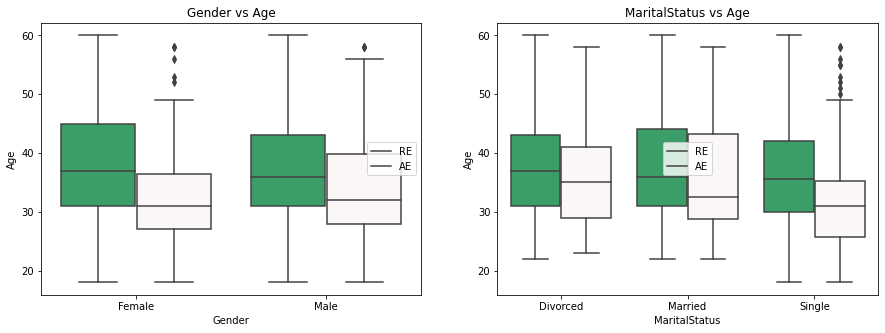

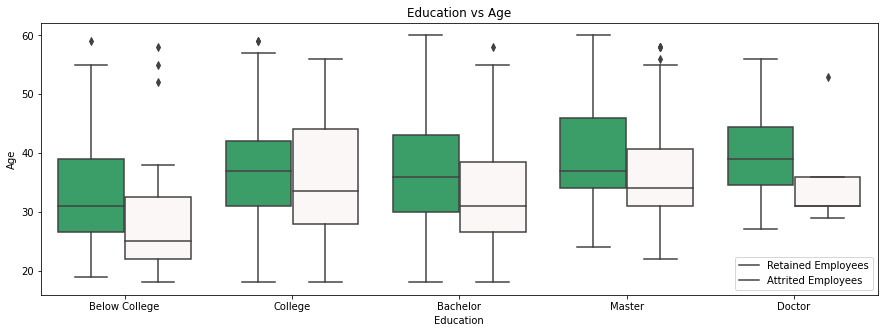

In [ ]:
fig = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in range(len(['Gender', 'MaritalStatus'])):
    plt.subplot(1,2,i+1)
    ax = sns.boxplot(x = ['Gender', 'MaritalStatus'][i],y = 'Age',data = df1,hue = 'Attrition',palette = colors);
    plt.legend(['RE', 'AE'])
    ax.set_xticklabels(tf1[['Gender', 'MaritalStatus'][i]][j] for j in sorted(df1[['Gender', 'MaritalStatus'][i]].unique()))
    plt.title(['Gender', 'MaritalStatus'][i] + ' vs Age');
plt.figure(figsize = (15,5))
ax = sns.boxplot(x = 'Education',y = 'Age',data = df1,hue = 'Attrition',palette = colors);
plt.legend(['Retained Employees', 'Attrited Employees'])
ax.set_xticklabels(['Below College', 'College', 'Bachelor', 'Master', 'Doctor'])
plt.title('Education' + ' vs Age');

In [ ]:
'''Employees with an Age of less than 30 are most prone to attrition irrespective of their Gender, MaritalStatus & Education.
Both Gender overlap the same Age values somewhere below 30 - above 35. When it comes to MaritalStatus, Single employees have a lower limit value for Age than that for Married & Divorced.
When it comes to Education, employees with College degree have a high range of Age values making them highly prone to removal from company.
Lower limit of Master & Doctor degree employees have a high value. Doctor degree holders also have the least range of values making them the least targeted employees when it comes to removal of employees.'''

'Employees with an Age of less than 30 are most prone to attrition irrespective of their Gender, MaritalStatus & Education.\nBoth Gender overlap the same Age values somewhere below 30 - above 35. When it comes to MaritalStatus, Single employees have a lower limit value for Age than that for Married & Divorced.\nWhen it comes to Education, employees with College degree have a high range of Age values making them highly prone to removal from company.\nLower limit of Master & Doctor degree employees have a high value. Doctor degree holders also have the least range of values making them the least targeted employees when it comes to removal of employees.'

In [ ]:
'''Employee Job Information :
It includes features that provide information about the job & it's characteristics!

List of Features :

EducationField
Department
JobLevel
JobRole
JobInvolvement
OverTime
JobSatisfaction'''

"Employee Job Information :\nIt includes features that provide information about the job & it's characteristics!\n\nList of Features :\n\nEducationField\nDepartment\nJobLevel\nJobRole\nJobInvolvement\nOverTime\nJobSatisfaction"

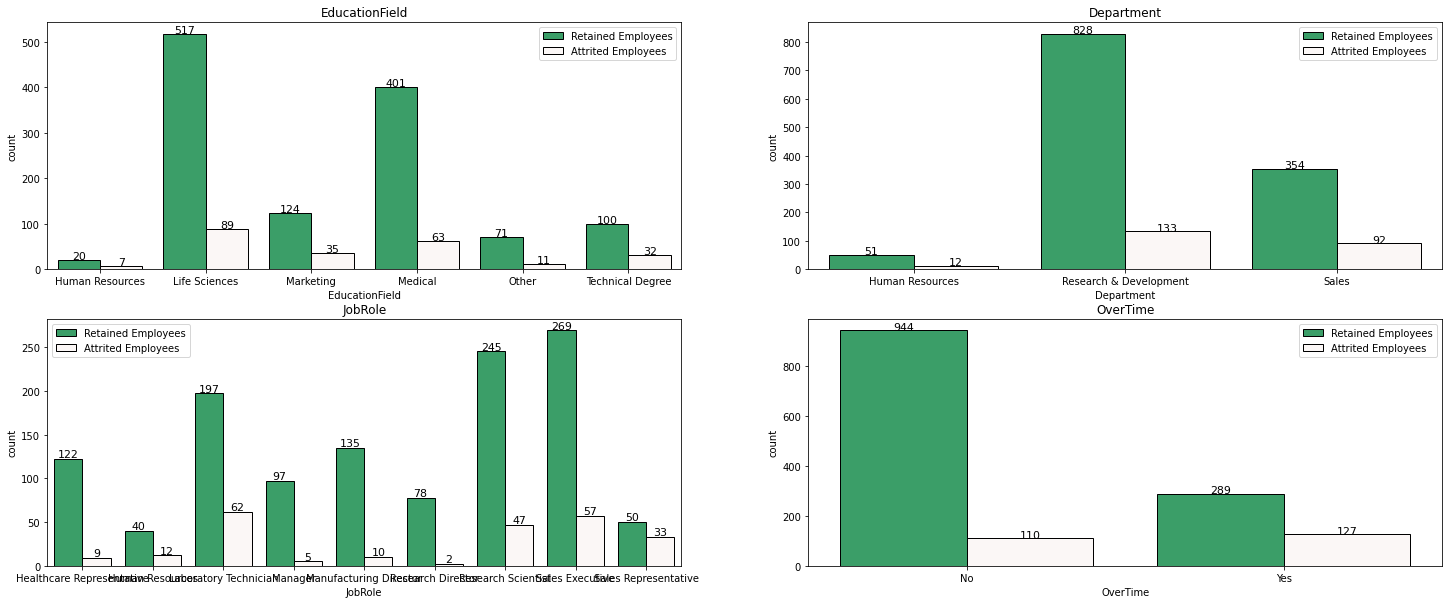

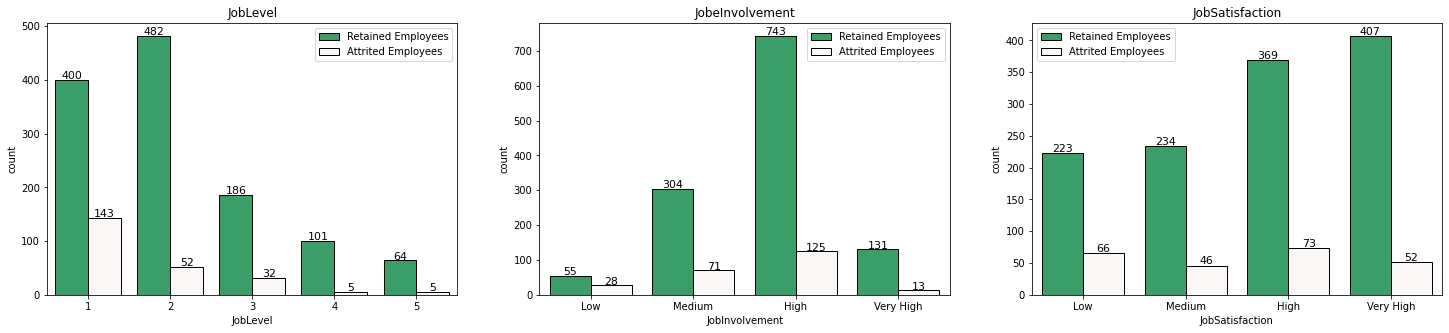

In [ ]:
fig = plt.subplots(nrows = 2,ncols = 2,figsize = (25,10))

for i in range(4):
    plt.subplot(2,2,i+1)
    ax = sns.countplot(['EducationField', 'Department', 'JobRole', 'OverTime'][i],data = df1, 
                       hue = 'Attrition', palette = colors,edgecolor = 'black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
    ax.set_xticklabels(tf1[['EducationField', 'Department', 'JobRole', 'OverTime'][i]][j] 
                       for j in sorted(df1[['EducationField', 'Department', 'JobRole', 'OverTime'][i]].unique()))
    plt.legend(['Retained Employees', 'Attrited Employees'])
    plt.title(['EducationField', 'Department', 'JobRole', 'OverTime'][i]);

fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,5))
plt.subplot(1,3,1)
ax = sns.countplot('JobLevel',data = df1, hue = 'Attrition', palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
plt.legend(['Retained Employees', 'Attrited Employees'])
plt.title('JobLevel');

plt.subplot(1,3,2)
ax = sns.countplot('JobInvolvement',data = df1, hue = 'Attrition', palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
ax.set_xticklabels(['Low', 'Medium','High','Very High'])
plt.legend(['Retained Employees', 'Attrited Employees'])
plt.title('JobeInvolvement');

plt.subplot(1,3,3)
ax = sns.countplot('JobSatisfaction',data = df1, hue = 'Attrition', palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
ax.set_xticklabels(['Low', 'Medium', 'High','Very High'])
plt.legend(['Retained Employees', 'Attrited Employees'])
plt.title('JobSatisfaction');

In [ ]:
'''All these graphs pretty much follow the same pattern of more the people in a category, higher is the number of removal of employees.
Hence, it can be deceiving as it does not call out the complete picture. Thus, we will check the attrition percentage of the individual category.'''

'All these graphs pretty much follow the same pattern of more the people in a category, higher is the number of removal of employees.\nHence, it can be deceiving as it does not call out the complete picture. Thus, we will check the attrition percentage of the individual category.'

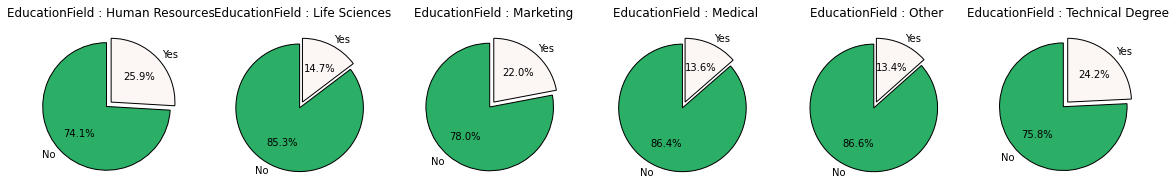

In [ ]:
fig = plt.subplots(nrows = 1,ncols = 6,figsize = (20,20))
for i in range(len(df1['EducationField'].unique())):
    plt.subplot(1,6,i+1)
    l = list(df1.loc[(df1['EducationField'] == i)]['Attrition'].value_counts())
    circle = [l[0] / sum(l) * 100,l[1] / sum(l) * 100]
    
    plt.pie(circle,labels = list(tf1['Attrition'][k] for k in sorted(df1['Attrition'].unique())),autopct = '%1.1f%%',startangle = 90,explode = (0.1,0),
            colors = colors, wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
    b = list(tf1['EducationField'][k] for k in sorted(df1['EducationField'].unique()))
    plt.title('EducationField : ' + b[i]);

In [ ]:
'''We can see that employees with EducationField of Human Resources, Technical Degree & Marketing have a higher chance of being removed.'''

'We can see that employees with EducationField of Human Resources, Technical Degree & Marketing have a higher chance of being removed.'

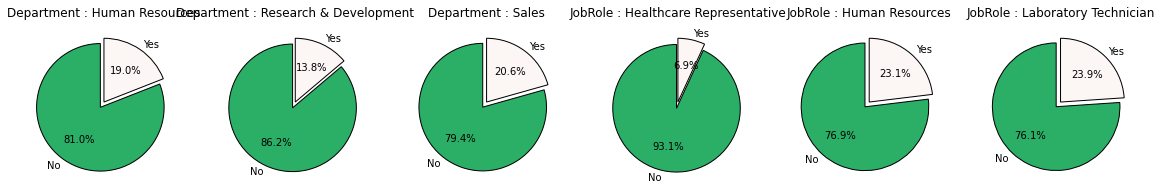

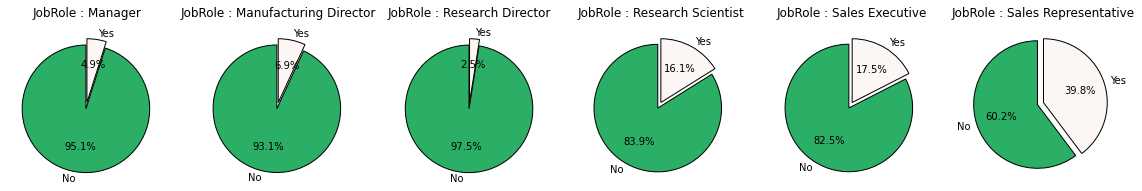

In [ ]:
fig = plt.subplots(nrows = 1,ncols = 6,figsize = (20,20))
c = list((sorted(df1['Department'].unique()) + sorted(df1['JobRole'].unique())[:3]))
for i in range(len(c)):
    
    plt.subplot(1,6,i+1)
    if i < 3:
        l = list(df1.loc[(df1['Department'] == i)]['Attrition'].value_counts())
        circle = [l[0] / sum(l) * 100,l[1] / sum(l) * 100]
    elif i > 2:
        l = list(df1.loc[(df1['JobRole'] == (i - 3))]['Attrition'].value_counts())
        circle = [l[0] / sum(l) * 100,l[1] / sum(l) * 100]

    plt.pie(circle,labels = list(tf1['Attrition'][k] for k in sorted(df1['Attrition'].unique())),autopct = '%1.1f%%',startangle = 90,explode = (0.1,0),
            colors = colors, wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
    if i < 3:
        b = list(tf1['Department'][k] for k in sorted(df1['Department'].unique()))
        plt.title('Department : ' + b[i]);
    elif i > 2:
        b = list(tf1['JobRole'][k] for k in sorted(df1['JobRole'].unique()))
        plt.title('JobRole : ' + b[i-3]);
        
fig = plt.subplots(nrows = 1,ncols = 6,figsize = (20,20))

for i in range(len(sorted(df1['JobRole'].unique())[3:])):
    
    plt.subplot(1,6,i+1)

    l = list(df1.loc[(df1['JobRole'] == (i+3))]['Attrition'].value_counts())
    circle = [l[0] / sum(l) * 100,l[1] / sum(l) * 100]
    plt.pie(circle,labels = list(tf1['Attrition'][k] for k in sorted(df1['Attrition'].unique())),autopct = '%1.1f%%',startangle = 90,explode = (0.1,0),
              colors = colors, wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
    b = list(tf1['JobRole'][k] for k in sorted(df1['JobRole'].unique()))
    plt.title('JobRole : ' + b[i+3]);

In [ ]:
'''From the above of pie charts, Sales & Human Resource Department employees have a high probability of discontinuing with the company than Research & Development.
When it comes to JobRole, out of the 9 roles, 4 roles display less than 7% of attrition rate whereas the remaining 5 roles have an attrition rate more than 15%.'''

'From the above of pie charts, Sales & Human Resource Department employees have a high probability of discontinuing with the company than Research & Development.\nWhen it comes to JobRole, out of the 9 roles, 4 roles display less than 7% of attrition rate whereas the remaining 5 roles have an attrition rate more than 15%.'

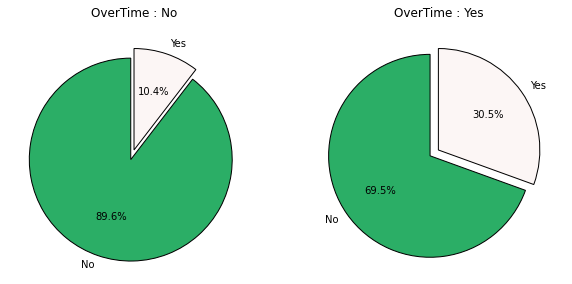

In [ ]:
fig = plt.subplots(nrows = 1, ncols = 2, figsize = (10,10))
for i in range(len(df1['OverTime'].unique())):
    plt.subplot(1,2,i+1)
    l = list(df1.loc[(df1['OverTime'] == i)]['Attrition'].value_counts())
    circle = [l[0] / sum(l) * 100,l[1] / sum(l) * 100]
    plt.pie(circle,labels = list(tf1['Attrition'][k] for k in sorted(df1['Attrition'].unique())),autopct = '%1.1f%%',startangle = 90,explode = (0.1,0),
            colors = colors, wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
    b = list(tf1['OverTime'][k] for k in sorted(df1['OverTime'].unique()))
    plt.title('OverTime : ' + b[i]);

In [ ]:
'''We can see that people that work OverTime are prone to be discontinued from the company! It has a 30% attrition rate i.e very less as compared to employees that do not work OverTime.'''

'We can see that people that work OverTime are prone to be discontinued from the company! It has a 30% attrition rate i.e very less as compared to employees that do not work OverTime.'

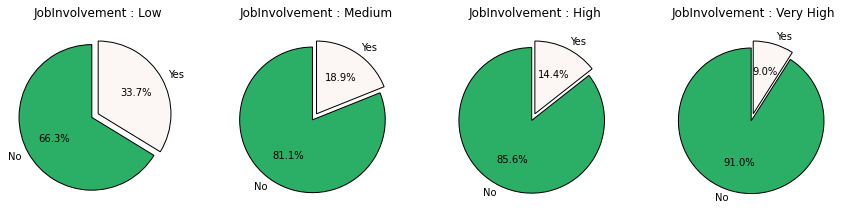

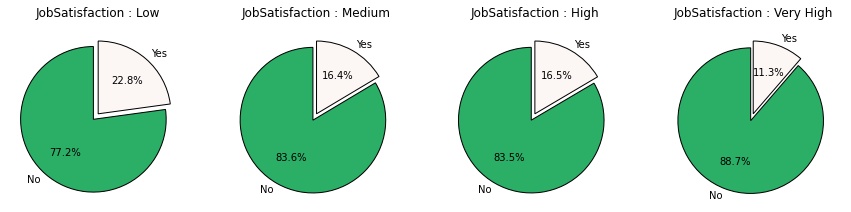

In [ ]:
fig = plt.subplots(nrows = 1,ncols = 4,figsize = (15,15))
for i in range(len(df1['JobInvolvement'].unique())):
    plt.subplot(1,4,i+1)
    l = list(df1.loc[(df1['JobInvolvement'] == (i+1))]['Attrition'].value_counts())
    circle = [l[0] / sum(l) * 100,l[1] / sum(l) * 100]
    plt.pie(circle,labels = list(tf1['Attrition'][k] for k in sorted(df1['Attrition'].unique())),autopct = '%1.1f%%',startangle = 90,explode = (0.1,0),
            colors = colors, wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
    plt.title('JobInvolvement : ' + ['Low', 'Medium', 'High', 'Very High'][i]);
        
fig = plt.subplots(nrows = 1,ncols = 4,figsize = (15,15))
for i in range(len(df1['JobSatisfaction'].unique())):
    plt.subplot(1,4,i+1)
    l = list(df1.loc[(df1['JobSatisfaction'] == (i+1))]['Attrition'].value_counts())
    circle = [l[0] / sum(l) * 100,l[1] / sum(l) * 100]
    plt.pie(circle,labels = list(tf1['Attrition'][k] for k in sorted(df1['Attrition'].unique())),autopct = '%1.1f%%',startangle = 90,explode = (0.1,0),
            colors = colors, wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
    plt.title('JobSatisfaction : ' + ['Low', 'Medium', 'High', 'Very High'][i]);

In [ ]:
'''We can observe that higher the JobInvolement, lower the attrition rate!
Similar pattern can be observed for JobSatisfaction.'''

'We can observe that higher the JobInvolement, lower the attrition rate!\nSimilar pattern can be observed for JobSatisfaction.'

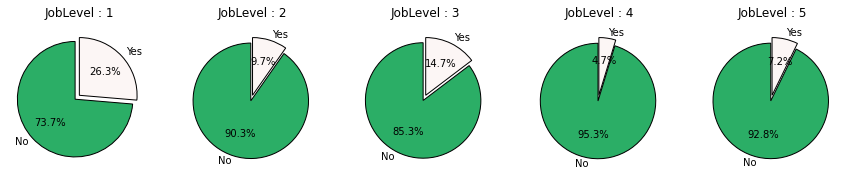

In [ ]:
fig = plt.subplots(nrows = 1,ncols = 5,figsize = (15,15))

for i in range(len(df1['JobLevel'].unique())):
    plt.subplot(1,5,i+1)
    l = list(df1.loc[(df1['JobLevel'] == (i+1))]['Attrition'].value_counts())
    circle = [l[0] / sum(l) * 100,l[1] / sum(l) * 100]
    plt.pie(circle,labels = list(tf1['Attrition'][k] for k in sorted(df1['Attrition'].unique())),autopct = '%1.1f%%',startangle = 90,explode = (0.1,0),
            colors = colors, wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
    plt.title('JobLevel : ' + str(i+1));


In [ ]:
'''JobLevel 1 has the attrition rate with 26.3%. JobLevel 3 comes at the 2nd position with 14.7%.
JobLevel 4 has the lowest attrition rate with 4.7%.
There seems to be no pattern. Hence, we will visualize the JobLevel with some features of the same group.'''

'JobLevel 1 has the attrition rate with 26.3%. JobLevel 3 comes at the 2nd position with 14.7%.\nJobLevel 4 has the lowest attrition rate with 4.7%.\nThere seems to be no pattern. Hence, we will visualize the JobLevel with some features of the same group.'

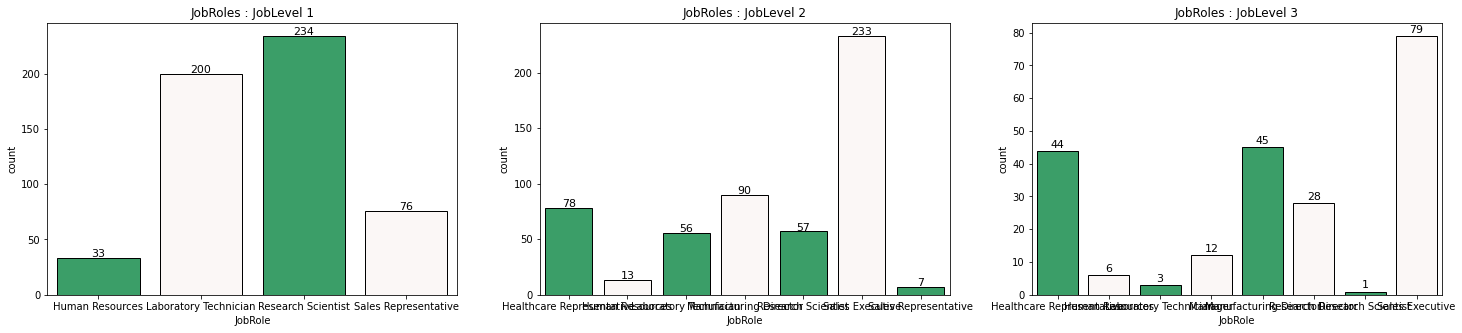

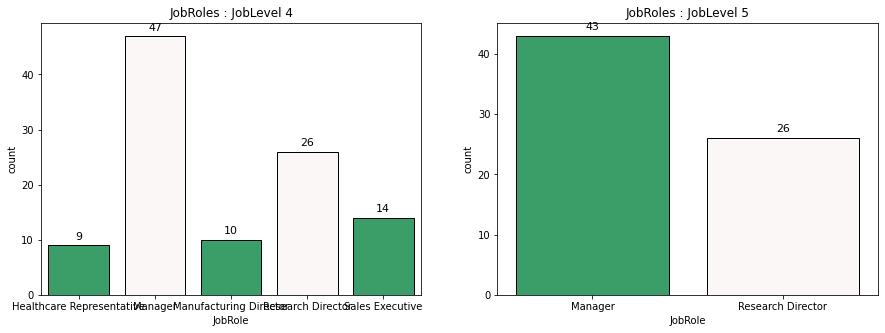

In [ ]:
plt.subplots(nrows = 1, ncols = 3, figsize = (25,5))
for i in range(len(sorted(df1['JobLevel'].unique())[:3])):
    plt.subplot(1,3,i+1)
    ax = sns.countplot('JobRole',data = df1[(df1['JobLevel'] == (i+1))], palette = colors,edgecolor = 'black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 1, rect.get_height(), horizontalalignment='center', fontsize = 11)
    ax.set_xticklabels(list(tf1['JobRole'][k] for k in sorted(df1[(df1['JobLevel'] == (i+1))]['JobRole'].unique())))
    plt.title('JobRoles : JobLevel ' + str(i+1));
    
plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))
for i in range(len(sorted(df1['JobLevel'].unique())[3:])):
    plt.subplot(1,2,i+1)
    ax = sns.countplot('JobRole',data = df1[(df1['JobLevel'] == (i+4))], palette = colors,edgecolor = 'black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 1, rect.get_height(), horizontalalignment='center', fontsize = 11)
    ax.set_xticklabels(list(tf1['JobRole'][k] for k in sorted(df1[(df1['JobLevel'] == (i+4))]['JobRole'].unique())))
    plt.title('JobRoles : JobLevel ' + str(i+4));

In [ ]:
'''JobLevel 1 has JobRole Research Scientist & Laboratory Technician in heavy numbers. For JobLevel 2, Sales Executive has the highest number of roles but it also has other 6 roles listed with low numbers as compared to Sales Executive.
Sales Executive, Manufacturing Director & Healthcare Representative take the 1st, 2nd & 3rd rank respectively in JobLevel 3. Manager roles have been found the highest number of times for JobLevel 4.
Manager & Research Director occupy the JobRole in JobLevel 5. A pattern that can be observed i.e as the JobLevel increases, number of JobRole & it's count decreases as well.'''

"JobLevel 1 has JobRole Research Scientist & Laboratory Technician in heavy numbers. For JobLevel 2, Sales Executive has the highest number of roles but it also has other 6 roles listed with low numbers as compared to Sales Executive.\nSales Executive, Manufacturing Director & Healthcare Representative take the 1st, 2nd & 3rd rank respectively in JobLevel 3. Manager roles have been found the highest number of times for JobLevel 4.\nManager & Research Director occupy the JobRole in JobLevel 5. A pattern that can be observed i.e as the JobLevel increases, number of JobRole & it's count decreases as well."

In [ ]:
'''Employee - Company Information :
It includes features that provide information employee's association with the company!

List of Features :

YearsAtCompany
YearsInCurrentRole
YearsWithCurrManager
YearsSinceLastPromotion
TrainingTimesLastYear
WorkLifeBalance'''

"Employee - Company Information :\nIt includes features that provide information employee's association with the company!\n\nList of Features :\n\nYearsAtCompany\nYearsInCurrentRole\nYearsWithCurrManager\nYearsSinceLastPromotion\nTrainingTimesLastYear\nWorkLifeBalance"

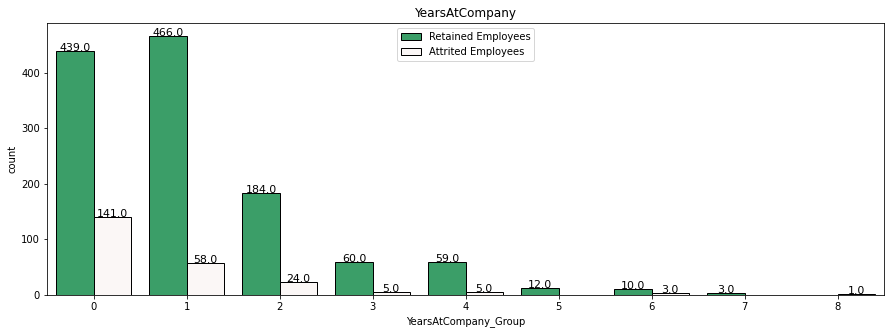

In [ ]:
df2['YearsAtCompany_Group'] = [int(i / 5) for i in df1['YearsAtCompany']]

plt.figure(figsize = (15, 5))
ax = sns.countplot('YearsAtCompany_Group', data = df2, hue = 'Attrition', palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height()+0.01, rect.get_height(), horizontalalignment='center', fontsize = 11)
plt.legend(['Retained Employees', 'Attrited Employees'])
plt.title('YearsAtCompany');

In [ ]:
'''Clearly, employees that have been at the company for 0 - 4 (0) years have been attrited the most number of times.
As the employees gain experience at the company, attrition reduces.'''

'Clearly, employees that have been at the company for 0 - 4 (0) years have been attrited the most number of times.\nAs the employees gain experience at the company, attrition reduces.'

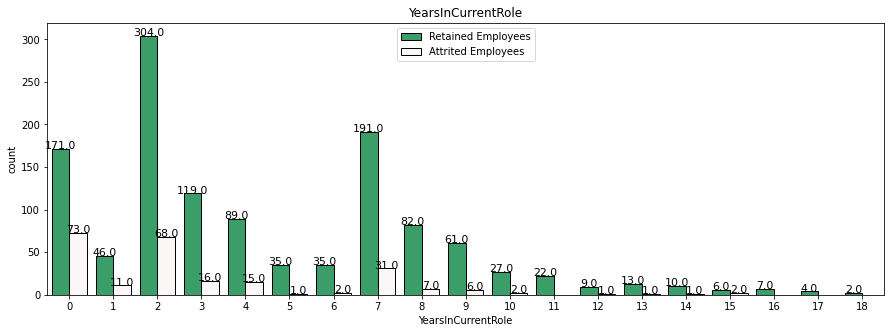

In [ ]:
plt.figure(figsize = (15, 5))

ax = sns.countplot('YearsInCurrentRole', data = df1, hue = 'Attrition', palette = colors,edgecolor = 'black');
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height()+0.01, rect.get_height(), horizontalalignment='center', fontsize = 11)
plt.legend(['Retained Employees', 'Attrited Employees'])
plt.title('YearsInCurrentRole');

In [ ]:
'''As expected by now, employees in their 1st role are very volatile and look for an early exit.
Another spike of attrition can also be observed when employees complete 2 years in their current role. It looks like either employees look for improvement in their role or the companies have done evaluation, thus taking a call about the employees.
This is then followed by attrition in years 3 & 4. This is probably a continuation of the attrition carried out in year 2.
One more significant spike can be observed in year 7 of their current role as the employees might look for an improvement or company decides to shake up things.'''

'As expected by now, employees in their 1st role are very volatile and look for an early exit.\nAnother spike of attrition can also be observed when employees complete 2 years in their current role. It looks like either employees look for improvement in their role or the companies have done evaluation, thus taking a call about the employees.\nThis is then followed by attrition in years 3 & 4. This is probably a continuation of the attrition carried out in year 2.\nOne more significant spike can be observed in year 7 of their current role as the employees might look for an improvement or company decides to shake up things.'

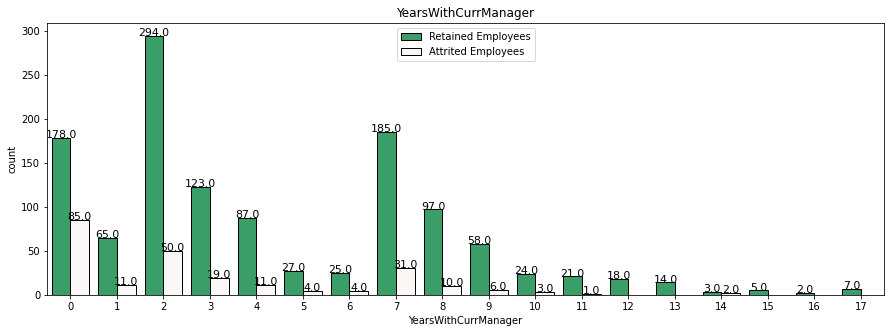

In [ ]:
plt.figure(figsize = (15, 5))

ax = sns.countplot('YearsWithCurrManager', data = df1, hue = 'Attrition', palette = colors,edgecolor = 'black');
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height()+0.01, rect.get_height(), horizontalalignment='center', fontsize = 11)
plt.legend(['Retained Employees', 'Attrited Employees'])
plt.title('YearsWithCurrManager');

In [ ]:
'''This is a very similar visualization to the previous graph of YearsInCurrentRole.
Peaks of attrition can be found at the sames of : 0, 2 & 7.'''

'This is a very similar visualization to the previous graph of YearsInCurrentRole.\nPeaks of attrition can be found at the sames of : 0, 2 & 7.'

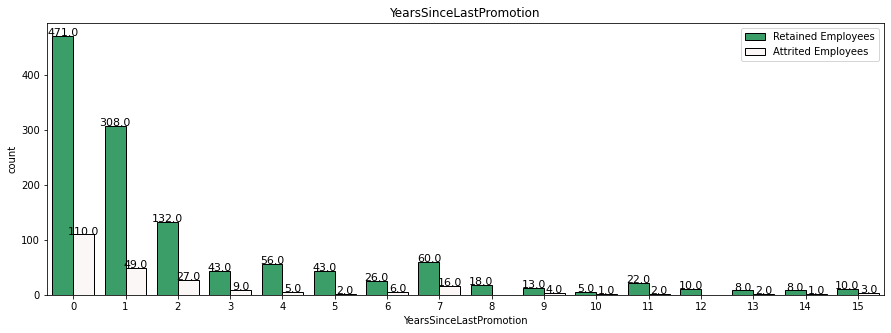

In [ ]:
plt.figure(figsize = (15, 5))

ax = sns.countplot('YearsSinceLastPromotion', data = df1, hue = 'Attrition', palette = colors,edgecolor = 'black');
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height()+0.01, rect.get_height(), horizontalalignment='center', fontsize = 11)
plt.legend(['Retained Employees', 'Attrited Employees'])
plt.title('YearsSinceLastPromotion');

In [ ]:
'''We can see that a huge number of attrition cases can be found for value 0. I guess it's majority values represent the freshers in the company.
1 & 2 years since the last promotion have also recorded a significant number of employee removal cases.
7 years since last promotion also has decent number of employee removal cases. This is value seems to have some correlation with the previous 2 graphs of YearsInCurrentRole & YearsWithCurrManager.'''

"We can see that a huge number of attrition cases can be found for value 0. I guess it's majority values represent the freshers in the company.\n1 & 2 years since the last promotion have also recorded a significant number of employee removal cases.\n7 years since last promotion also has decent number of employee removal cases. This is value seems to have some correlation with the previous 2 graphs of YearsInCurrentRole & YearsWithCurrManager."

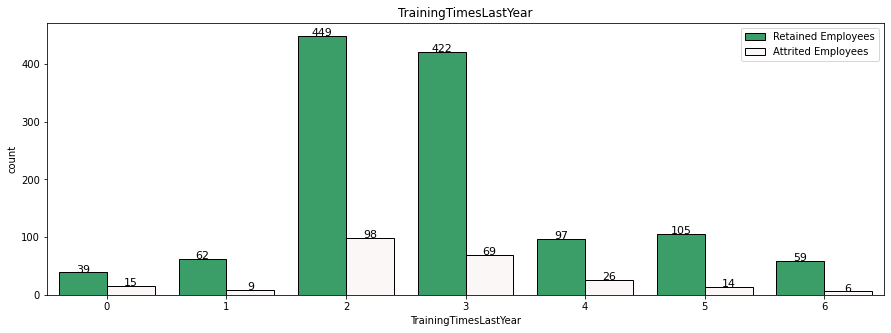

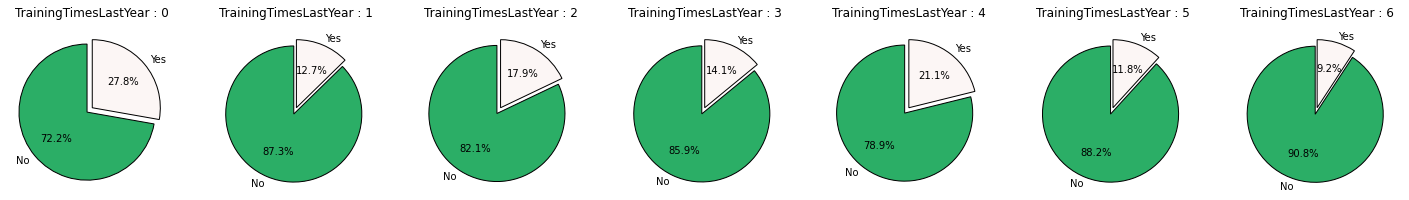

In [ ]:
plt.figure(figsize = (15, 5))

ax = sns.countplot('TrainingTimesLastYear', data = df1, hue = 'Attrition', palette = colors,edgecolor = 'black');
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height()+0.01, rect.get_height(), horizontalalignment='center', fontsize = 11)
plt.legend(['Retained Employees', 'Attrited Employees'])
plt.title('TrainingTimesLastYear');

fig = plt.subplots(nrows = 1,ncols = 7,figsize = (25,25))

for i in range(len(df1['TrainingTimesLastYear'].unique())):
    plt.subplot(1,7,i+1)
    l = list(df1.loc[(df1['TrainingTimesLastYear'] == (i))]['Attrition'].value_counts())
    circle = [l[0] / sum(l) * 100,l[1] / sum(l) * 100]
    plt.pie(circle,labels = list(tf1['Attrition'][k] for k in sorted(df1['Attrition'].unique())),autopct = '%1.1f%%',startangle = 90,explode = (0.1,0),
            colors = colors, wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
    plt.title('TrainingTimesLastYear : ' + str(i));

In [ ]:
'''Values 3 & 4 have higher values but the attrition percentage tells us a different story.
TrainingTimesLastYear : 0, TrainingTimesLastYear : 4 & TrainingTimesLastYear : 2 dominate the attrition percentage.
It looks like training is very essential as the attrition percentage is very high when no training is conducted, 27.8%. Clearly, there is a competency problem.
For TrainingTimesLastYear : 4, attrition percentage of 21.1% can be found which is high. Another point can be about the difficulty of the training & it's evaluation.'''

"Values 3 & 4 have higher values but the attrition percentage tells us a different story.\nTrainingTimesLastYear : 0, TrainingTimesLastYear : 4 & TrainingTimesLastYear : 2 dominate the attrition percentage.\nIt looks like training is very essential as the attrition percentage is very high when no training is conducted, 27.8%. Clearly, there is a competency problem.\nFor TrainingTimesLastYear : 4, attrition percentage of 21.1% can be found which is high. Another point can be about the difficulty of the training & it's evaluation."

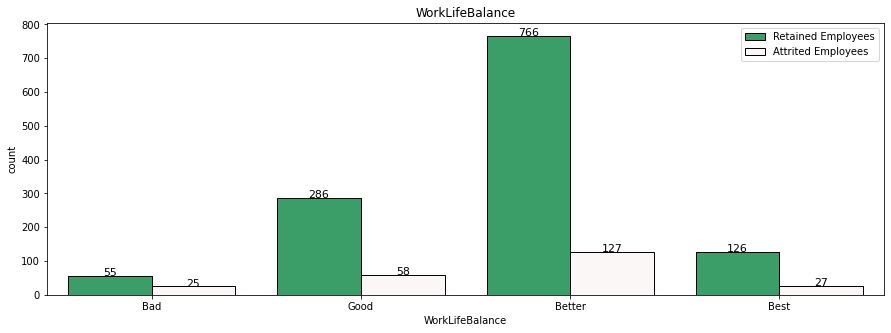

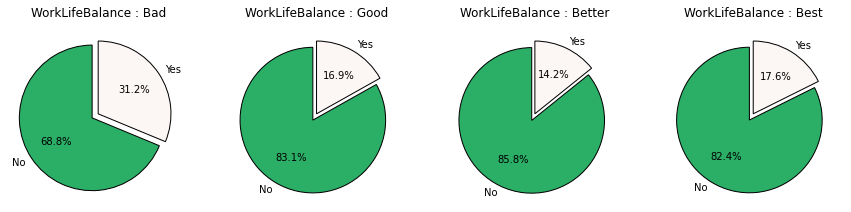

In [ ]:
plt.figure(figsize = (15, 5))

ax = sns.countplot('WorkLifeBalance', data = df1, hue = 'Attrition', palette = colors,edgecolor = 'black');
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height()+0.01, rect.get_height(), horizontalalignment='center', fontsize = 11)
plt.legend(['Retained Employees', 'Attrited Employees'])
ax.set_xticklabels(['Bad', 'Good', 'Better', 'Best'])
plt.title('WorkLifeBalance');

fig = plt.subplots(nrows = 1,ncols = 4,figsize = (15,15))

for i in range(len(df1['WorkLifeBalance'].unique())):
    plt.subplot(1,4,i+1)
    l = list(df1.loc[(df1['WorkLifeBalance'] == (i+1))]['Attrition'].value_counts())
    circle = [l[0] / sum(l) * 100,l[1] / sum(l) * 100]
    plt.pie(circle,labels = list(tf1['Attrition'][k] for k in sorted(df1['Attrition'].unique())),autopct = '%1.1f%%',startangle = 90,explode = (0.1,0),
            colors = colors, wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
    plt.title('WorkLifeBalance : ' + ['Bad', 'Good', 'Better', 'Best'][i]);

In [ ]:
'''As expected Bad WorkLifeBalance has resulted in a massive attrition percentage of 31.2%.
Surprisingly, Best WorkLifeBalance has the 2nd highest value of attrition percentage.
We will check the WorkLifeBalance feature with the JobRole & JobLevel features of the Employee Job Information!'''

'As expected Bad WorkLifeBalance has resulted in a massive attrition percentage of 31.2%.\nSurprisingly, Best WorkLifeBalance has the 2nd highest value of attrition percentage.\nWe will check the WorkLifeBalance feature with the JobRole & JobLevel features of the Employee Job Information!'

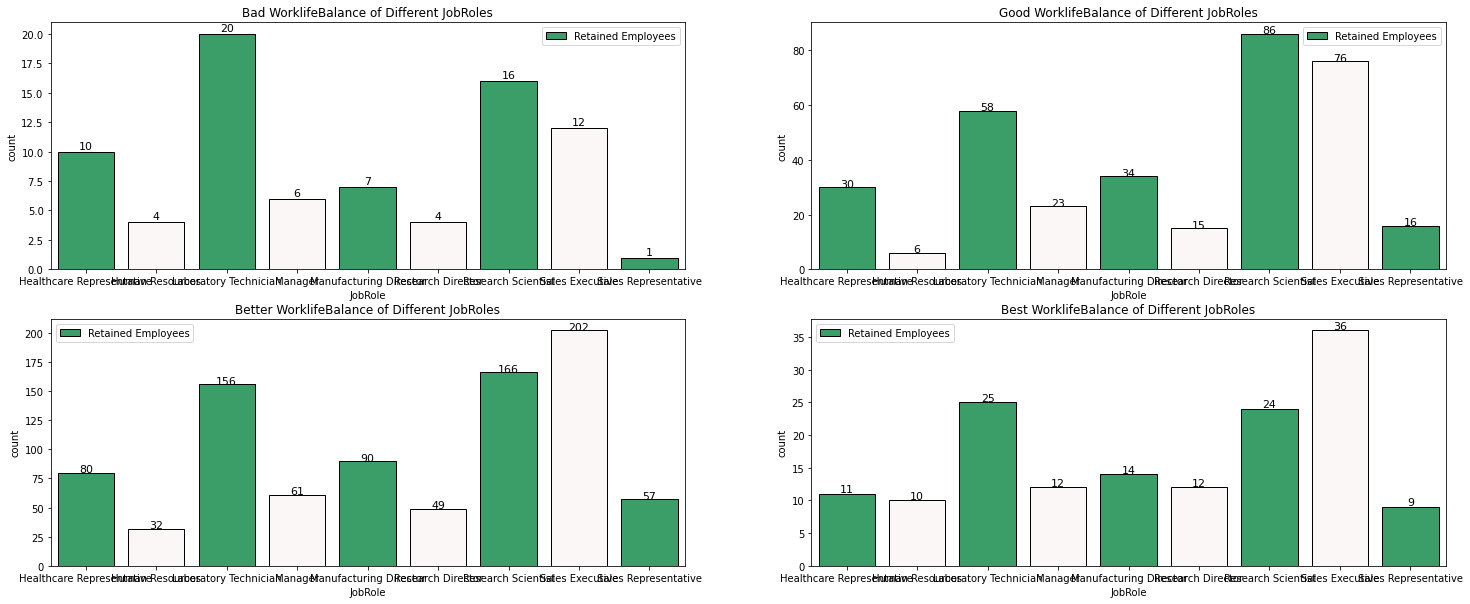

In [ ]:
fig = plt.subplots(nrows = 2, ncols = 2, figsize = (25,10))
for i in range(4):
    plt.subplot(2,2,i+1)
    ax = sns.countplot('JobRole', data = df1[df1['WorkLifeBalance'] == (i+1)], palette = colors, edgecolor = 'black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 0.25, rect.get_height(), horizontalalignment='center', fontsize = 11)
    ax.set_xticklabels(tf1['JobRole'][k] for k in sorted(df1[df1['WorkLifeBalance'] == (i+1)]['JobRole'].unique()))
    plt.legend(['Retained Employees', 'Attrited Employees'])
    plt.title(['Bad', 'Good', 'Better', 'Best'][i] + ' WorklifeBalance of Different JobRoles');

In [ ]:
'''Laboratory Technician, Research Scientist & Sales Executive have recorded high numbers for all the values of WorkLifeBalance.'''

'Laboratory Technician, Research Scientist & Sales Executive have recorded high numbers for all the values of WorkLifeBalance.'

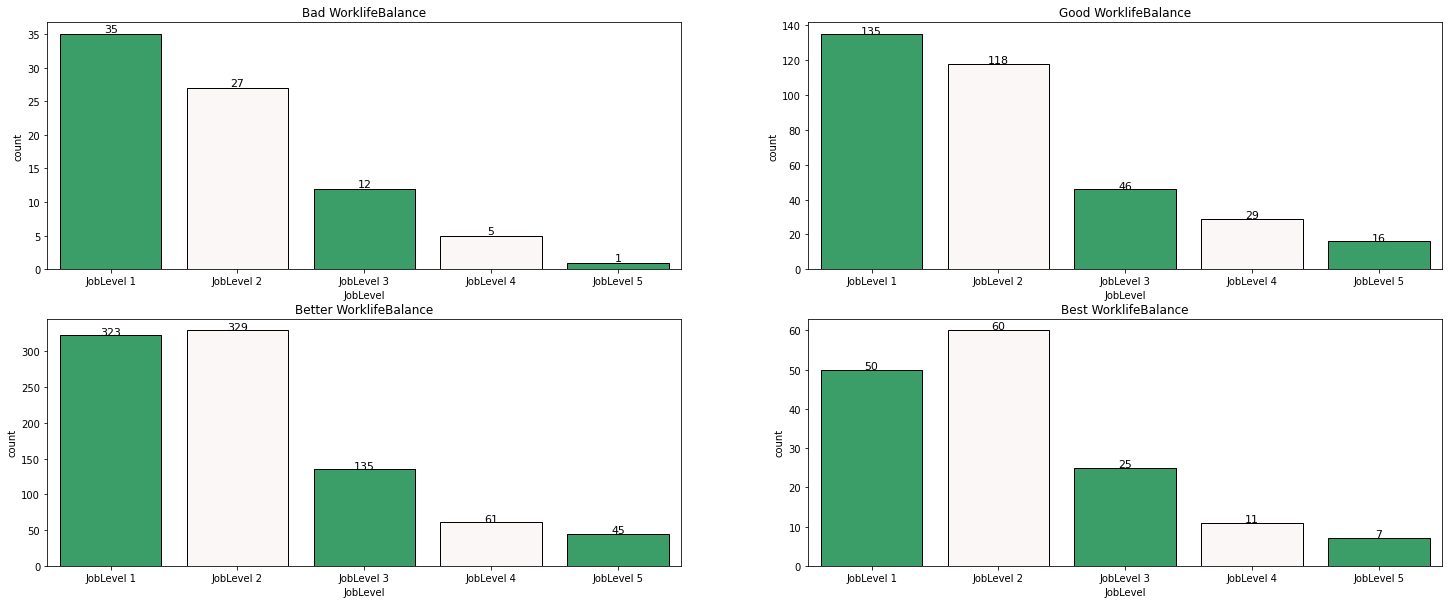

In [ ]:
fig = plt.subplots(nrows = 2, ncols = 2, figsize = (25,10))
for i in range(4):
    plt.subplot(2,2,i+1)
    ax = sns.countplot('JobLevel', data = df1[df1['WorkLifeBalance'] == (i+1)], palette = colors, edgecolor = 'black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 0.25, rect.get_height(), horizontalalignment='center', fontsize = 11)
    ax.set_xticklabels(['JobLevel 1', 'JobLevel 2', 'JobLevel 3', 'JobLevel 4', 'JobLevel 5'])
    plt.title(['Bad', 'Good', 'Better', 'Best'][i] + ' WorklifeBalance');

In [ ]:
'''JobLevel 1 & JobLevel 2 record high values in for all the WorkLifeBalance values.'''

'JobLevel 1 & JobLevel 2 record high values in for all the WorkLifeBalance values.'

In [ ]:
'''Company Information :
It includes features that provide information company's characteristics w.r.t employees!

List of Features :

PercentSalaryHike
StockOptionLevel
BusinessTravel
PerformanceRating
EnvironmentSatisfaction
RelationshipSatisfaction'''

"Company Information :\nIt includes features that provide information company's characteristics w.r.t employees!\n\nList of Features :\n\nPercentSalaryHike\nStockOptionLevel\nBusinessTravel\nPerformanceRating\nEnvironmentSatisfaction\nRelationshipSatisfaction"

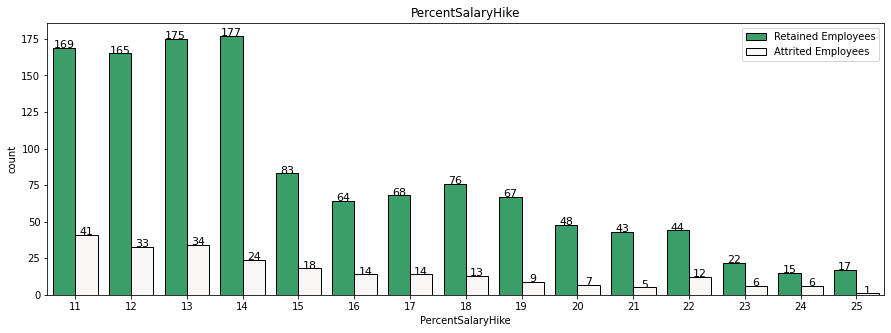

In [ ]:
plt.figure(figsize = (15, 5))
ax = sns.countplot('PercentSalaryHike', data = df1, hue = 'Attrition', palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height()+0.01, rect.get_height(), horizontalalignment='center', fontsize = 11)
plt.legend(['Retained Employees', 'Attrited Employees'])
plt.title('PercentSalaryHike');

In [ ]:
'''We can see that low salary hikes of 11 - 14 have been given to a lot of employees and hence the attrition is high as well.
As the PercentSalaryHike increases, number of attrited employees decrease!'''

'We can see that low salary hikes of 11 - 14 have been given to a lot of employees and hence the attrition is high as well.\nAs the PercentSalaryHike increases, number of attrited employees decrease!'

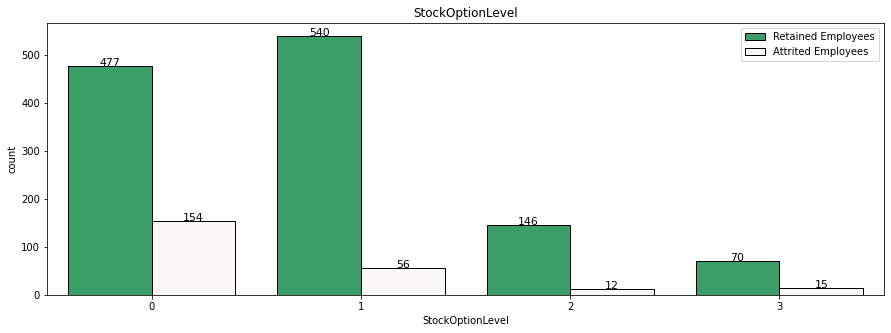

In [ ]:
plt.figure(figsize = (15, 5))
ax = sns.countplot('StockOptionLevel', data = df1, hue = 'Attrition', palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height()+0.01, rect.get_height(), horizontalalignment='center', fontsize = 11)
plt.legend(['Retained Employees', 'Attrited Employees'])
plt.title('StockOptionLevel');

In [ ]:
'''Same story as the PercentSalaryHike can be observed.
Number of employees reduces as the StockOptionLevel increases.'''

'Same story as the PercentSalaryHike can be observed.\nNumber of employees reduces as the StockOptionLevel increases.'

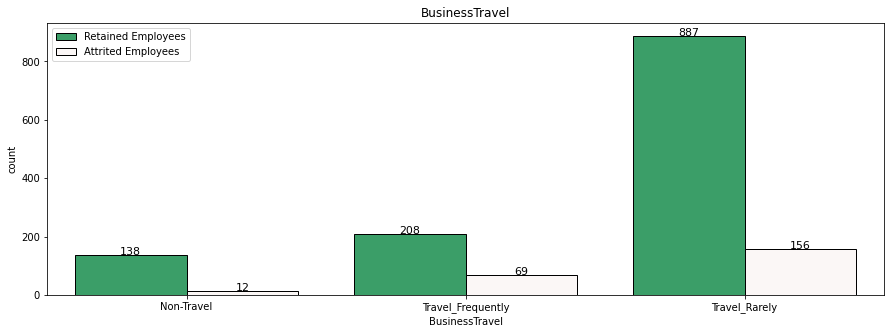

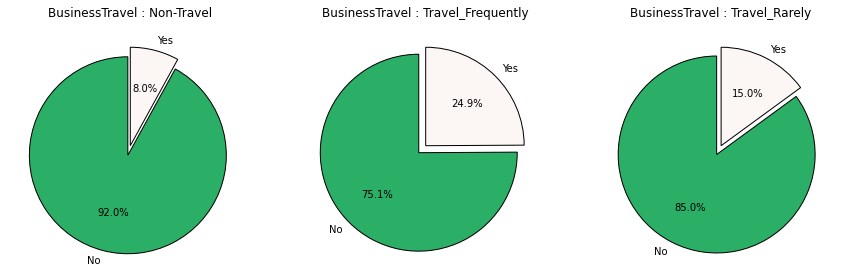

In [ ]:
plt.figure(figsize = (15, 5))
ax = sns.countplot('BusinessTravel', data = df1, hue = 'Attrition', palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height()+0.01, rect.get_height(), horizontalalignment='center', fontsize = 11)
ax.set_xticklabels([tf1['BusinessTravel'][k] for k in sorted(df1['BusinessTravel'].unique())])
plt.legend(['Retained Employees', 'Attrited Employees'])
plt.title('BusinessTravel');

fig = plt.subplots(nrows = 1,ncols = 3,figsize = (15,15))
for i in range(len(df1['BusinessTravel'].unique())):
    plt.subplot(1,3,i+1)
    l = list(df1.loc[(df1['BusinessTravel'] == i)]['Attrition'].value_counts())
    circle = [l[0] / sum(l) * 100,l[1] / sum(l) * 100]
    plt.pie(circle,labels = list(tf1['Attrition'][k] for k in sorted(df1['Attrition'].unique())),autopct = '%1.1f%%',startangle = 90,explode = (0.1,0),
            colors = colors, wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
    plt.title('BusinessTravel : ' + tf1['BusinessTravel'][i]);

In [ ]:
'''We can see that number of employees that Travel_Rarely is huge as compared to Non-Travel & Travel_Frequently.
When it comes to attrition rate, Travel_Frequently employees have a 25% probability of being removed from the company.'''

'We can see that number of employees that Travel_Rarely is huge as compared to Non-Travel & Travel_Frequently.\nWhen it comes to attrition rate, Travel_Frequently employees have a 25% probability of being removed from the company.'

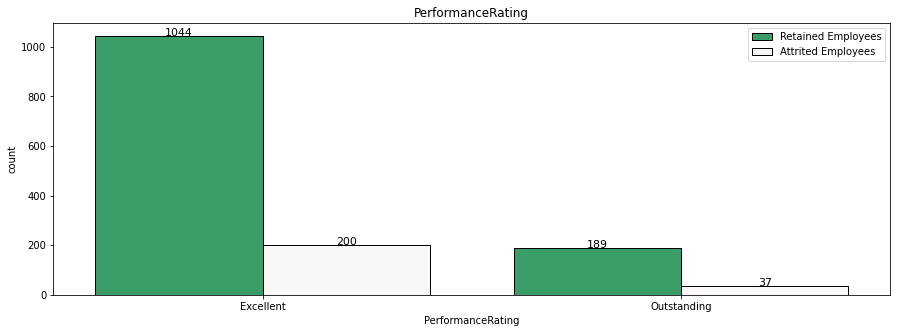

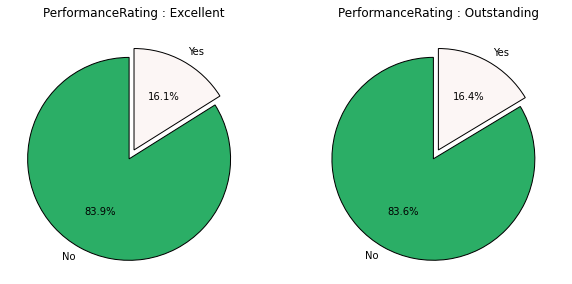

In [ ]:
plt.figure(figsize = (15, 5))
ax = sns.countplot('PerformanceRating', data = df1, hue = 'Attrition', palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height()+0.01, rect.get_height(), horizontalalignment='center', fontsize = 11)
ax.set_xticklabels(['Excellent', 'Outstanding'])
plt.legend(['Retained Employees', 'Attrited Employees'])
plt.title('PerformanceRating');

fig = plt.subplots(nrows = 1,ncols = 2,figsize = (10,10))

for i in range(len(df1['PerformanceRating'].unique())):
    plt.subplot(1,2,i+1)
    l = list(df1.loc[(df1['PerformanceRating'] == (i+3))]['Attrition'].value_counts())
    circle = [l[0] / sum(l) * 100,l[1] / sum(l) * 100]
    plt.pie(circle,labels = list(tf1['Attrition'][k] for k in sorted(df1['Attrition'].unique())),autopct = '%1.1f%%',startangle = 90,explode = (0.1,0),
            colors = colors, wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
    plt.title('PerformanceRating : ' + ['Low', 'Good', 'Excellent', 'Outstanding'][i+2]);

In [ ]:
'''As expected, employees have more Excellent rating than Outstanding. But when it comes to attrition rate, values of Excellent & Outstanding are very close with 16.1% & 16.4%.
No data of Low & Good PerformanceRating are recorded.'''

'As expected, employees have more Excellent rating than Outstanding. But when it comes to attrition rate, values of Excellent & Outstanding are very close with 16.1% & 16.4%.\nNo data of Low & Good PerformanceRating are recorded.'

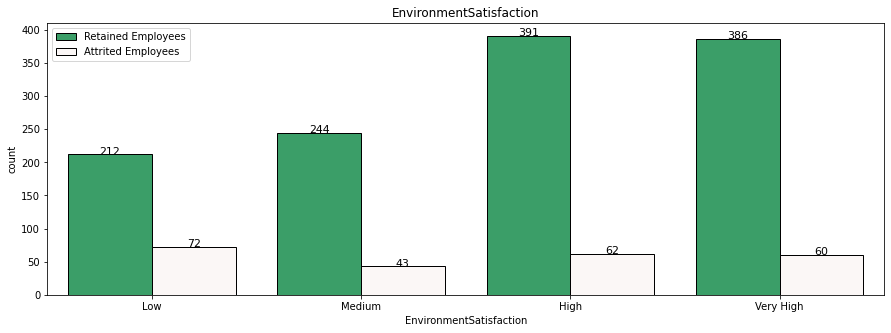

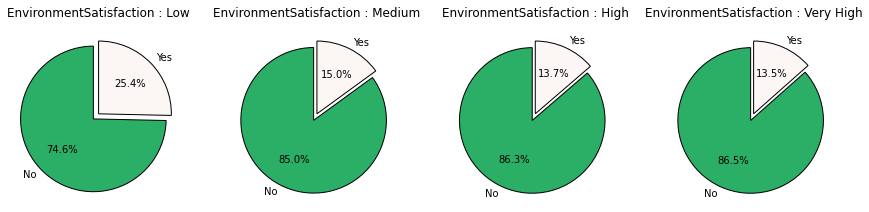

In [ ]:
plt.figure(figsize = (15, 5))
ax = sns.countplot('EnvironmentSatisfaction', data = df1, hue = 'Attrition', palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height()+0.01, rect.get_height(), horizontalalignment='center', fontsize = 11)
ax.set_xticklabels(['Low', 'Medium', 'High', 'Very High'])
plt.legend(['Retained Employees', 'Attrited Employees'])
plt.title('EnvironmentSatisfaction');

fig = plt.subplots(nrows = 1,ncols = 4,figsize = (15,15))

for i in range(len(df1['EnvironmentSatisfaction'].unique())):
    plt.subplot(1,4,i+1)
    l = list(df1.loc[(df1['EnvironmentSatisfaction'] == (i+1))]['Attrition'].value_counts())
    circle = [l[0] / sum(l) * 100,l[1] / sum(l) * 100]
    plt.pie(circle,labels = list(tf1['Attrition'][k] for k in sorted(df1['Attrition'].unique())),autopct = '%1.1f%%',startangle = 90,explode = (0.1,0),
            colors = colors, wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
    plt.title('EnvironmentSatisfaction : ' + ['Low', 'Medium', 'High', 'Very High'][i]);

In [ ]:
'''High & Very High EnvironmentSatisfaction values have been noted the most number of times.
As expected, they have a low attrition rate as compared to Low & Medium EnvironmentSatisfaction.
The attrition rate improves as the EnvironmentSatisfaction improves!'''

'High & Very High EnvironmentSatisfaction values have been noted the most number of times.\nAs expected, they have a low attrition rate as compared to Low & Medium EnvironmentSatisfaction.\nThe attrition rate improves as the EnvironmentSatisfaction improves!'

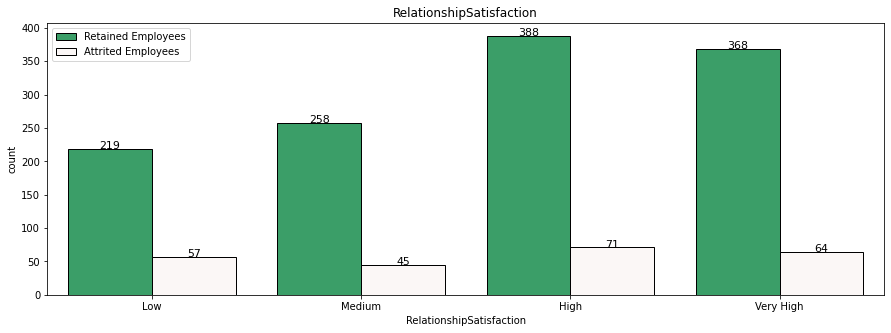

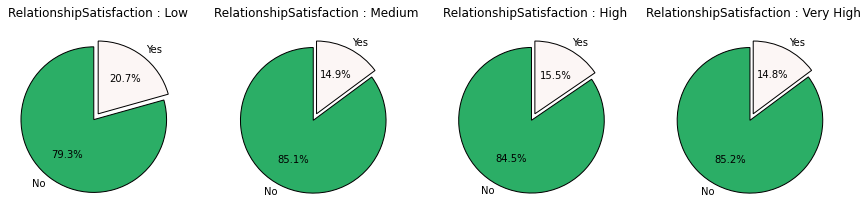

In [ ]:
plt.figure(figsize = (15, 5))
ax = sns.countplot('RelationshipSatisfaction', data = df1, hue = 'Attrition', palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height()+0.01, rect.get_height(), horizontalalignment='center', fontsize = 11)
ax.set_xticklabels(['Low', 'Medium', 'High', 'Very High'])
plt.legend(['Retained Employees', 'Attrited Employees'])
plt.title('RelationshipSatisfaction');
fig = plt.subplots(nrows = 1,ncols = 4,figsize = (15,15))
for i in range(len(df1['RelationshipSatisfaction'].unique())):
    plt.subplot(1,4,i+1)
    l = list(df1.loc[(df1['RelationshipSatisfaction'] == (i+1))]['Attrition'].value_counts())
    circle = [l[0] / sum(l) * 100,l[1] / sum(l) * 100]
    plt.pie(circle,labels = list(tf1['Attrition'][k] for k in sorted(df1['Attrition'].unique())),autopct = '%1.1f%%',startangle = 90,explode = (0.1,0),
            colors = colors, wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
    plt.title('RelationshipSatisfaction : ' + ['Low', 'Medium', 'High', 'Very High'][i]);

In [ ]:
'''The above visualizations of RelationshipSatisfaction is very similar to EnvironmentSatisfaction.
As the values of RelationshipSatisfaction improves, attrition rate reduces.'''

'The above visualizations of RelationshipSatisfaction is very similar to EnvironmentSatisfaction.\nAs the values of RelationshipSatisfaction improves, attrition rate reduces.'

In [ ]:
'''Finances :
It includes features that provide information about employee finances!

List of Features :

MonthlyIncome
HourlyRate
DailyRate
MonthlyRate'''

'Finances :\nIt includes features that provide information about employee finances!\n\nList of Features :\n\nMonthlyIncome\nHourlyRate\nDailyRate\nMonthlyRate'

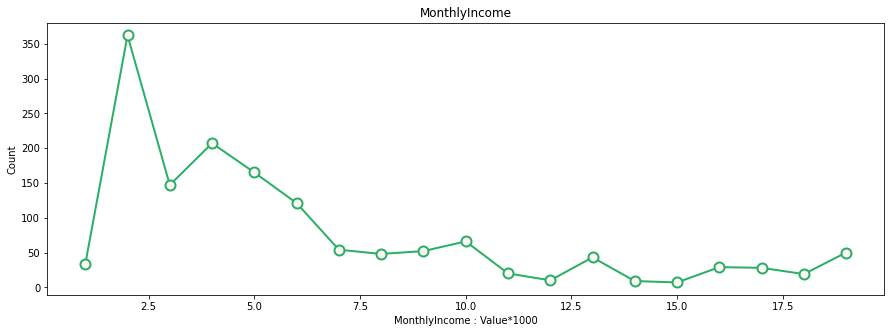

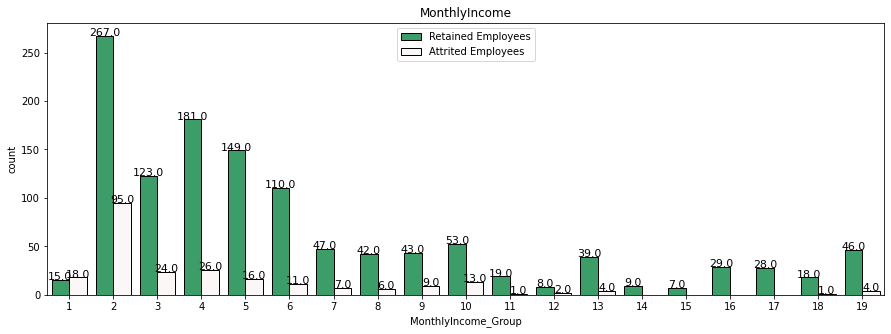

In [ ]:
df2['MonthlyIncome_Group'] = [int(i / 1000) for i in df1['MonthlyIncome']]
v1 = [df2['MonthlyIncome_Group'].value_counts()[i] for i in sorted(df2['MonthlyIncome_Group'].value_counts().index)]
plt.figure(figsize = (15,5))
ax = sns.lineplot(x = sorted(df2['MonthlyIncome_Group'].value_counts().index), y = v1, lw = 2, color = colors[0], marker = 'o', 
                  markersize = 10, markerfacecolor = colors[1], markeredgewidth = 2, markeredgecolor = colors[0], )
plt.xlabel('MonthlyIncome : Value*1000'); plt.ylabel('Count')
plt.title("MonthlyIncome");
plt.figure(figsize = (15, 5))
ax = sns.countplot('MonthlyIncome_Group', data = df2, hue = 'Attrition', palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height()+0.01, rect.get_height(), horizontalalignment='center', fontsize = 11)
plt.legend(['Retained Employees', 'Attrited Employees'])
plt.title('MonthlyIncome');

In [ ]:
'''The graph highlights an overall decline in the count of the values.
MonthlyIncome values between 1000 - 2000 are present in high numbers. Values between 3000 - 4000 comes second with more than 200 values present in this range.'''

'The graph highlights an overall decline in the count of the values.\nMonthlyIncome values between 1000 - 2000 are present in high numbers. Values between 3000 - 4000 comes second with more than 200 values present in this range.'

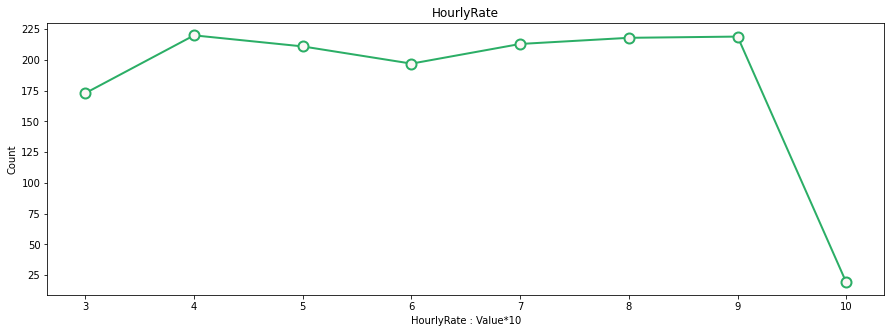

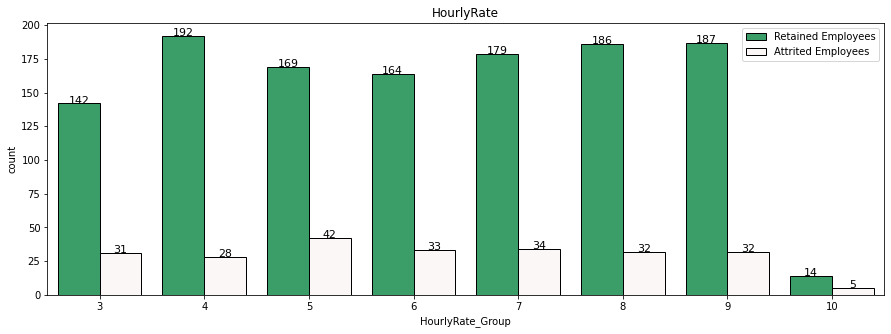

In [ ]:
df2['HourlyRate_Group'] = [int(i / 10) for i in df1['HourlyRate']]
v1 = [df2['HourlyRate_Group'].value_counts()[i] for i in sorted(df2['HourlyRate_Group'].value_counts().index)]
plt.figure(figsize = (15,5))
ax = sns.lineplot(x = sorted(df2['HourlyRate_Group'].value_counts().index), y = v1, lw = 2, color = colors[0], marker = 'o', 
                  markersize = 10, markerfacecolor = colors[1], markeredgewidth = 2, markeredgecolor = colors[0], )
plt.xlabel('HourlyRate : Value*10'); plt.ylabel('Count')
plt.title("HourlyRate");

plt.figure(figsize = (15, 5))
ax = sns.countplot('HourlyRate_Group', data = df2, hue = 'Attrition', palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height()+0.01, rect.get_height(), horizontalalignment='center', fontsize = 11)
plt.legend(['Retained Employees', 'Attrited Employees'])
plt.title('HourlyRate');

In [ ]:
'''For HourlyRate, values between 30 - 100 are present with a count of more than 175+ each.
Attrition rate of these values is also low and very close to each other.
For HourlyRate of more than 100, very few values are present and hence attrition is high as well.'''

'For HourlyRate, values between 30 - 100 are present with a count of more than 175+ each.\nAttrition rate of these values is also low and very close to each other.\nFor HourlyRate of more than 100, very few values are present and hence attrition is high as well.'

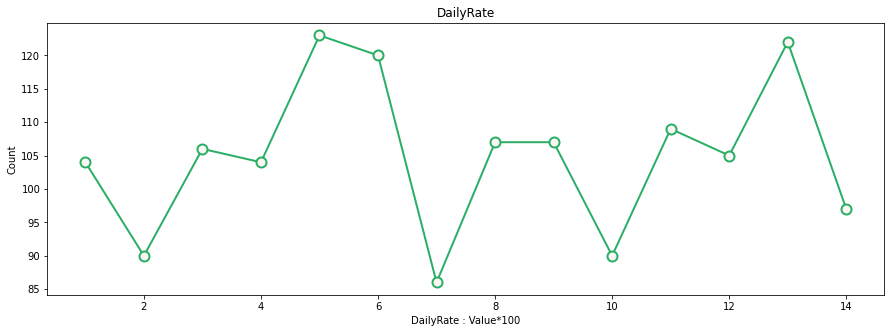

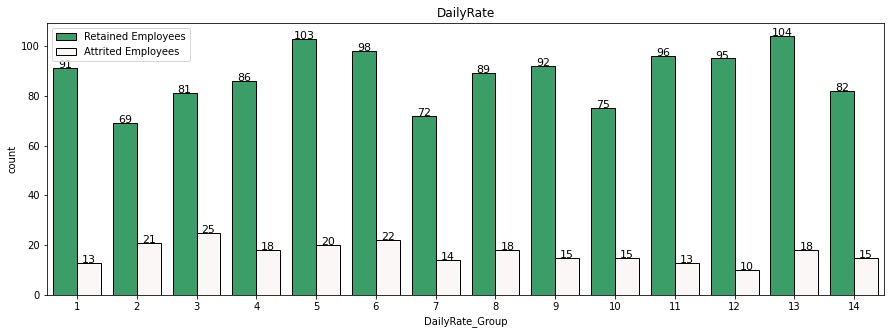

In [ ]:
df2['DailyRate_Group'] = [int(i / 100) for i in df1['DailyRate']]
v1 = [df2['DailyRate_Group'].value_counts()[i] for i in sorted(df2['DailyRate_Group'].value_counts().index)]

plt.figure(figsize = (15,5))
ax = sns.lineplot(x = sorted(df2['DailyRate_Group'].value_counts().index), y = v1, lw = 2, color = colors[0], marker = 'o', 
                  markersize = 10, markerfacecolor = colors[1], markeredgewidth = 2, markeredgecolor = colors[0], )
plt.xlabel('DailyRate : Value*100'); plt.ylabel('Count')
plt.title("DailyRate");

plt.figure(figsize = (15, 5))
ax = sns.countplot('DailyRate_Group', data = df2, hue = 'Attrition', palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height()+0.01, rect.get_height(), horizontalalignment='center', fontsize = 11)
plt.legend(['Retained Employees', 'Attrited Employees'])
plt.title('DailyRate');

In [ ]:
'''Number of attrited employees is close to each other. Certain drop in count of values are present.
Values between 600 - 700 have the lowest count.'''

'Number of attrited employees is close to each other. Certain drop in count of values are present.\nValues between 600 - 700 have the lowest count.'

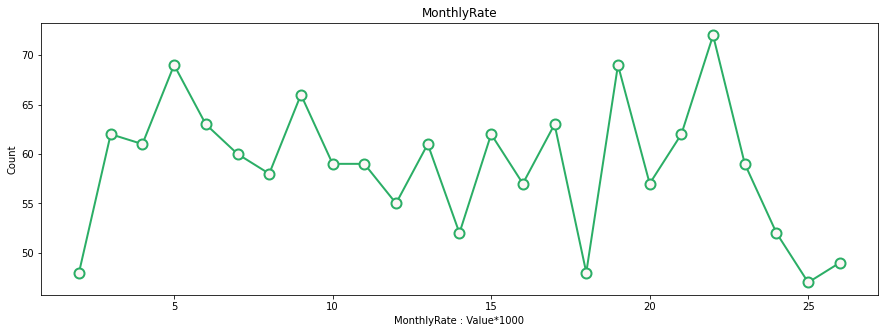

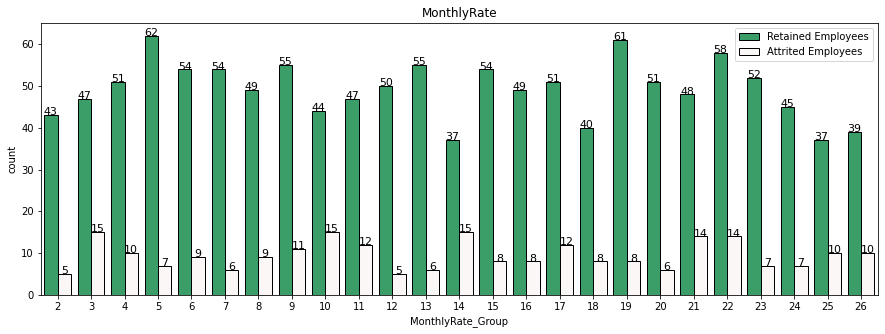

In [ ]:
df2['MonthlyRate_Group'] = [int(i / 1000) for i in df1['MonthlyRate']]
v1 = [df2['MonthlyRate_Group'].value_counts()[i] for i in sorted(df2['MonthlyRate_Group'].value_counts().index)]

plt.figure(figsize = (15,5))
ax = sns.lineplot(x = sorted(df2['MonthlyRate_Group'].value_counts().index), y = v1, lw = 2, color = colors[0], marker = 'o', 
                  markersize = 10, markerfacecolor = colors[1], markeredgewidth = 2, markeredgecolor = colors[0], )
plt.xlabel('MonthlyRate : Value*1000'); plt.ylabel('Count')
plt.title("MonthlyRate");

plt.figure(figsize = (15, 5))
ax = sns.countplot('MonthlyRate_Group', data = df2, hue = 'Attrition', palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height()+0.01, rect.get_height(), horizontalalignment='center', fontsize = 11)
plt.legend(['Retained Employees', 'Attrited Employees'])
plt.title('MonthlyRate');

In [ ]:
'''Values of attrited employees are very close to each other.

Values between 21000 - 22000 have the highest count.

We will check the features of Finances with Department & JobLevel features of Employee Job Information.'''

'Values of attrited employees are very close to each other.\n\nValues between 21000 - 22000 have the highest count.\n\nWe will check the features of Finances with Department & JobLevel features of Employee Job Information.'

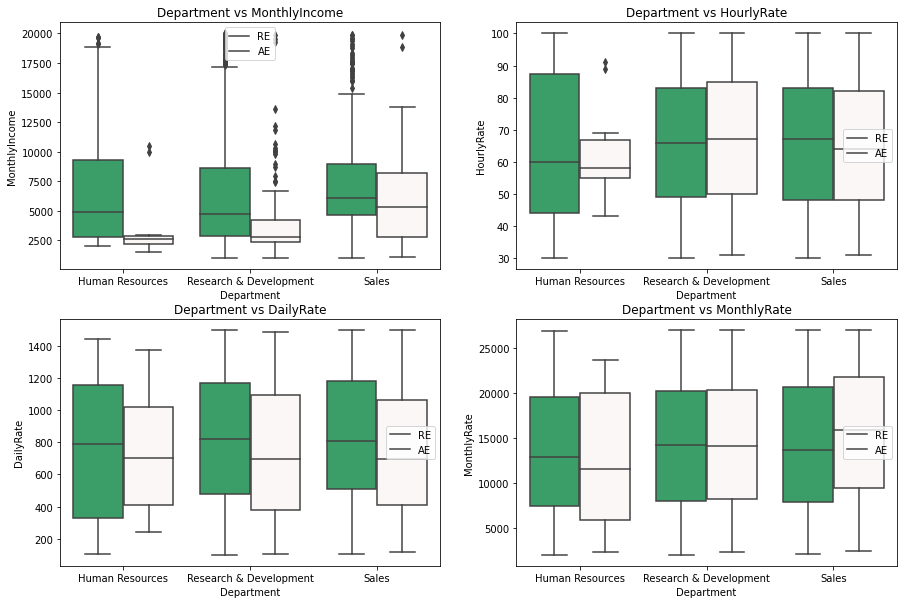

In [ ]:
fig = plt.subplots(nrows = 2,ncols = 2,figsize = (15,10))
for i in range(len(l5)):
    plt.subplot(2,2,i+1)
    ax = sns.boxplot(x = 'Department', y = l5[i], data = df1, hue = 'Attrition',palette = colors);
    plt.legend(['RE', 'AE'])
    ax.set_xticklabels([tf1['Department'][k] for k in sorted(df1['Department'].unique())])
    plt.title('Department vs ' + l5[i]);

In [ ]:
'''MonthlyIncome has too many outlier values. These outliers are probably from the JobLevel 5 which is low in numbers & attrition rate.
For HourlyRate, Research & Development & Sales department pretty much occupy the same range of values for attrition & non-attrition. Range of attrition values for Human Resources is very small.
Similar to HourlyRate, same pattern can be observed for Research & Development & Sales department for DailyRate & MonthlyRate.'''

'MonthlyIncome has too many outlier values. These outliers are probably from the JobLevel 5 which is low in numbers & attrition rate.\nFor HourlyRate, Research & Development & Sales department pretty much occupy the same range of values for attrition & non-attrition. Range of attrition values for Human Resources is very small.\nSimilar to HourlyRate, same pattern can be observed for Research & Development & Sales department for DailyRate & MonthlyRate.'

In [1]:
fig = plt.subplots(nrows = 2,ncols = 2,figsize = (15,10))
for i in range(len(l5)):
    plt.subplot(2,2,i+1)
    ax = sns.boxplot(x = 'JobLevel', y = l5[i], data = df1, hue = 'Attrition',palette = colors);
    plt.legend(['Real Earning', 'Avg Earning'])
    ax.set_xticklabels(['JobLevel 1', 'JobLevel 2', 'JobLevel 3', 'JobLevel 4', 'JobLevel 5'])
    plt.title('JobLevel vs ' + l5[i]);

NameError: ignored

In [ ]:
'''As expected, as the JobLevel increases, MonthlyIncome increases! The upper limit value of the previous JobLevel value is lower than the lower limit value of the succeding JobLevel value.
Upper limit values of JobLevel of HourlyRate are very close to each other. It does not display a significant difference to separate out as MonthlyIncome.
Pretty much same thing can be observed for DailyRate & MonthlyRate. JobLevel 5's DailyRate & MonthlyRate upper limit is clearly differentiable.'''

"As expected, as the JobLevel increases, MonthlyIncome increases! The upper limit value of the previous JobLevel value is lower than the lower limit value of the succeding JobLevel value.\nUpper limit values of JobLevel of HourlyRate are very close to each other. It does not display a significant difference to separate out as MonthlyIncome.\nPretty much same thing can be observed for DailyRate & MonthlyRate. JobLevel 5's DailyRate & MonthlyRate upper limit is clearly differentiable."

In [ ]:
'''Summary of Insights / Order / Values of features w.r.t target variable (Attrition) :
General Employee Information :

Age : 20 - 44
Gender: Male > Female
MaritalStatus : Single > Married > Divorced
Education : Below College > Bachelor > College > Master > Doctor
DistanceFromHome : 20 - 24 > 15 - 19 > 25 - 29 > 10 - 14 > 5 - 9
TotalWorkingYears : Very high chances during the 1st 10 working years
NumCompaniesWorked : High chances during 1st - 2nd job. Chances increase by a huge margin after working in 4th company.'''

'Summary of Insights / Order / Values of features w.r.t target variable (Attrition) :\nGeneral Employee Information :\n\nAge : 20 - 44\nGender: Male > Female\nMaritalStatus : Single > Married > Divorced\nEducation : Below College > Bachelor > College > Master > Doctor\nDistanceFromHome : 20 - 24 > 15 - 19 > 25 - 29 > 10 - 14 > 5 - 9\nTotalWorkingYears : Very high chances during the 1st 10 working years\nNumCompaniesWorked : High chances during 1st - 2nd job. Chances increase by a huge margin after working in 4th company.'

In [ ]:
'''Employee Job Information :

EducationField : Human Resources > Technical Degree > Marketing > Life Sciences > Medical > Other
Department : Sales > Human Resources > Reasearch & Development
JobLevel : JobLevel 1 > JobLevel 3 > JobLevel 2 > JobLevel 5 > JobLevel 4. We can see that the JobRoles with high attrition rate are present in the JobLevel with high attrition rate.
JobRole : Sales Representative > Laboratory Technician > Human Resources > Sales Executive > Research Scientist > Healthcare Representative = Manufacturing Director > Manager > Research Director
JobInvolvement : Low > Medium > High > Very High
OverTime : Yes > No
JobSatisfaction : : Low > Medium > High > Very High'''

'Employee Job Information :\n\nEducationField : Human Resources > Technical Degree > Marketing > Life Sciences > Medical > Other\nDepartment : Sales > Human Resources > Reasearch & Development\nJobLevel : JobLevel 1 > JobLevel 3 > JobLevel 2 > JobLevel 5 > JobLevel 4. We can see that the JobRoles with high attrition rate are present in the JobLevel with high attrition rate.\nJobRole : Sales Representative > Laboratory Technician > Human Resources > Sales Executive > Research Scientist > Healthcare Representative = Manufacturing Director > Manager > Research Director\nJobInvolvement : Low > Medium > High > Very High\nOverTime : Yes > No\nJobSatisfaction : : Low > Medium > High > Very High'

In [ ]:
'''Employee Company Information :

YearsAtCompany : 0 - 4 > 5 - 9 > 10 - 14 >
YearsInCurrentRole : Some peaks of high attrition values without any pattern is found.
YearsWithCurrManager : Some peaks of high attrition values without any pattern is found.
YearsSinceLastPromotion : 0 > 1 > 2. Some other peaks are also found with significant values.
TrainingTimesLastYear : 0 > 4 > 2 > 3 > 1 > 5 > 6
WorkLifeBalance : Bad > Best > Good > Better'''

'Employee Company Information :\n\nYearsAtCompany : 0 - 4 > 5 - 9 > 10 - 14 >\nYearsInCurrentRole : Some peaks of high attrition values without any pattern is found.\nYearsWithCurrManager : Some peaks of high attrition values without any pattern is found.\nYearsSinceLastPromotion : 0 > 1 > 2. Some other peaks are also found with significant values.\nTrainingTimesLastYear : 0 > 4 > 2 > 3 > 1 > 5 > 6\nWorkLifeBalance : Bad > Best > Good > Better'

In [ ]:
'''Company Features :

PercentSalaryHike : 11 - 14 has the highest attrition rate. As the value increases, number of attrited employees decrease.
StockOptionLevel : Number of employees reduces as the StockOptionLevel increases.
BusinessTravel : Travel_Frequently > Travel_Rarely > Non-Travel
PerformanceRating : Excellent = Outstanding. No values of Low & Good recorded.
EnvironmentSatisfaction : Low > Medium > High > Very High
RelationshipSatisfaction : Low > High > Medium > Very High'''

'Company Features :\n\nPercentSalaryHike : 11 - 14 has the highest attrition rate. As the value increases, number of attrited employees decrease.\nStockOptionLevel : Number of employees reduces as the StockOptionLevel increases.\nBusinessTravel : Travel_Frequently > Travel_Rarely > Non-Travel\nPerformanceRating : Excellent = Outstanding. No values of Low & Good recorded.\nEnvironmentSatisfaction : Low > Medium > High > Very High\nRelationshipSatisfaction : Low > High > Medium > Very High'

In [ ]:
'''Finances :

MonthlyIncome : 2000 - 3000
HourlyRate : 50 - 60. Values are very close to each other.
DailyRate : 300 - 400. Values are very close to each other.
MonthlyRate : Very close and small peaks are present.
According to the data, these insights / order / range of values can lead to attrition!'''

'Finances :\n\nMonthlyIncome : 2000 - 3000\nHourlyRate : 50 - 60. Values are very close to each other.\nDailyRate : 300 - 400. Values are very close to each other.\nMonthlyRate : Very close and small peaks are present.\nAccording to the data, these insights / order / range of values can lead to attrition!'

In [ ]:
'''The dataset is Unbalanced with a bias towards Retained Employees in a ratio of 5.2 : 1 for Retained Employees : Attrited Employees.
We will first balance the dataset using SMOTE Analysis!'''

'The dataset is Unbalanced with a bias towards Retained Employees in a ratio of 5.2 : 1 for Retained Employees : Attrited Employees.\nWe will first balance the dataset using SMOTE Analysis!'

In [ ]:
'''In order to cope with unbalanced data, there are 2 options :

Undersampling : Trim down the majority samples of the target variable.
Oversampling : Increase the minority samples of the target variable to the majority samples.
For best performances, combination of undersampling and oversampling is recommended.

First, we will undersample the majority samples and it is followed by oversampling minority samples.

For data balancing, we will use imblearn.'''

'In order to cope with unbalanced data, there are 2 options :\n\nUndersampling : Trim down the majority samples of the target variable.\nOversampling : Increase the minority samples of the target variable to the majority samples.\nFor best performances, combination of undersampling and oversampling is recommended.\n\nFirst, we will undersample the majority samples and it is followed by oversampling minority samples.\n\nFor data balancing, we will use imblearn.'

In [ ]:
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [ ]:
cols = list(df1.columns)
cols.remove('Attrition')

over = SMOTE(sampling_strategy = 0.85)
under = RandomUnderSampler(sampling_strategy = 0.1)
f1 = df1.loc[:,cols]
t1 = df1.loc[:,'Attrition']

steps = [('over', over)]
pipeline = Pipeline(steps=steps)
f1, t1 = pipeline.fit_resample(f1, t1)
Counter(t1)

Counter({1: 1048, 0: 1233})

In [ ]:
'''Calculation for Data Balancing :
Sampling Strategy : It is a ratio which is the common paramter for oversampling and undersampling.
Sampling Strategy : ( Samples of Minority Class ) / ( Samples of Majority Class )
In this case,

Majority Class : Retained Employees : 1233 samples
Minority Class : Attrited Employees : 237 samples'''

'Calculation for Data Balancing :\nSampling Strategy : It is a ratio which is the common paramter for oversampling and undersampling.\nSampling Strategy : ( Samples of Minority Class ) / ( Samples of Majority Class )\nIn this case,\n\nMajority Class : Retained Employees : 1233 samples\nMinority Class : Attrited Employees : 237 samples'

In [ ]:
'''Oversampling : Increase the minority class samples
Sampling_Strategy = 0.85

0.85 = ( Minority Class Samples ) / 1233

After oversampling,

Majority Class : Retained Employees : 1233 samples
Minority Class : Attrited Employees : 1048 samples
Final Class Samples :

Majority Class : Retained Employees : 1233 samples
Minority Class : Attrited Employees : 1048 samples

Here, we balance the data by increasing the minority group to majority group. In this case we only increase the minority data points as the data is very less.
For imbalanced datasets, we duplicate the data to deal with the potential bias in the predictions.
Due to this duplication process, we are using synthetic data for modeling purposes to ensure that the predictions are not skewed towards the majority target class value.
Thus, evaluating models using accuracy will be misleading. Instead, we will go for confusion matrix, ROC-AUC graph and ROC-AUC score for model evaluation.'''

'Oversampling : Increase the minority class samples\nSampling_Strategy = 0.85\n\n0.85 = ( Minority Class Samples ) / 1233\n\nAfter oversampling,\n\nMajority Class : Retained Employees : 1233 samples\nMinority Class : Attrited Employees : 1048 samples\nFinal Class Samples :\n\nMajority Class : Retained Employees : 1233 samples\nMinority Class : Attrited Employees : 1048 samples\n\nHere, we balance the data by increasing the minority group to majority group. In this case we only increase the minority data points as the data is very less.\nFor imbalanced datasets, we duplicate the data to deal with the potential bias in the predictions.\nDue to this duplication process, we are using synthetic data for modeling purposes to ensure that the predictions are not skewed towards the majority target class value.\nThus, evaluating models using accuracy will be misleading. Instead, we will go for confusion matrix, ROC-AUC graph and ROC-AUC score for model evaluation.'

In [ ]:
'''Data Leakage :
Data Leakage is the problem when the information outside the training data is used for model creation. It is one of the most ignored problem.
In order to create robust models, solving data leakage is a must! Creation of overly optimistic models which are practically useless & cannot be used in production have become common.
Model performance degrades when Data Leakage is not dealt with & the model is sent online. It is a difficult concept to understand because it seems quite trivial.
Typical approach used is transforming / modifying the entire dataset by filling NAN values with mean, median & mode, standardisation, normalization, etc.
When we execute the above process in order to make the dataset ready for modeling, we use the values from the entire dataset & thus indirectly provide information from the to-be test data i.e outside of the training data.
Thus, in order to avoid Data Leakage, it is advised to use train-test-split before any transformations. Execute the transformations according to the training data for the training as well as test data. Use of k-fold cross validation is also suggested!'''

'Data Leakage :\nData Leakage is the problem when the information outside the training data is used for model creation. It is one of the most ignored problem.\nIn order to create robust models, solving data leakage is a must! Creation of overly optimistic models which are practically useless & cannot be used in production have become common.\nModel performance degrades when Data Leakage is not dealt with & the model is sent online. It is a difficult concept to understand because it seems quite trivial.\nTypical approach used is transforming / modifying the entire dataset by filling NAN values with mean, median & mode, standardisation, normalization, etc.\nWhen we execute the above process in order to make the dataset ready for modeling, we use the values from the entire dataset & thus indirectly provide information from the to-be test data i.e outside of the training data.\nThus, in order to avoid Data Leakage, it is advised to use train-test-split before any transformations. Execute t

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(f1, t1, test_size = 0.15, random_state = 2)

In [ ]:
#Correlation Matrix
x_train_test = x_train.copy(deep = True)
x_train_test['Attrition'] = y_train

In [ ]:
'''In order to visualize the correlation matrix, we create a new dataframe that contains values from x_train & y_train.
Thus, we reject anything outside the training data to avoid data leakage.'''

'In order to visualize the correlation matrix, we create a new dataframe that contains values from x_train & y_train.\nThus, we reject anything outside the training data to avoid data leakage.'

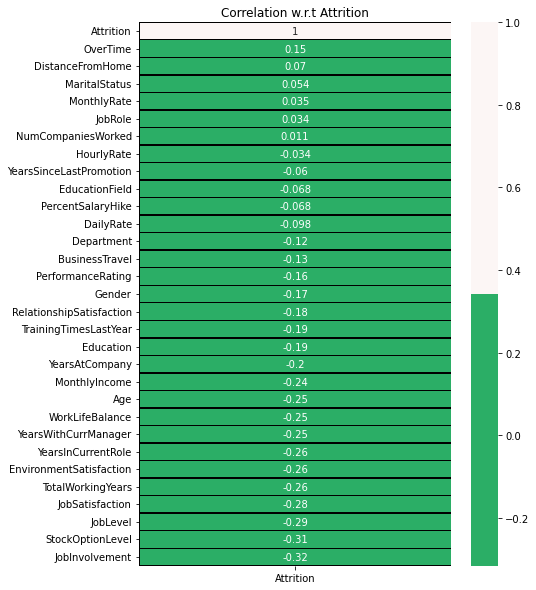

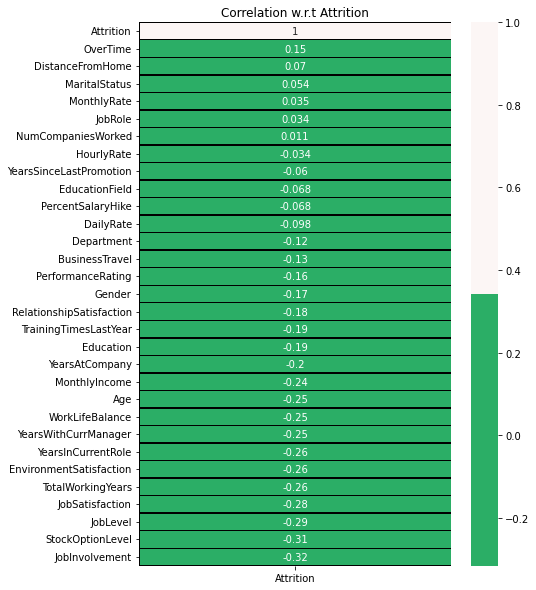

In [ ]:
corr = x_train_test.corrwith(x_train_test['Attrition']).sort_values(ascending = False).to_frame()
corr.columns = ['Attrition']
plt.subplots(figsize = (7,10))
sns.heatmap(corr,annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black');
plt.title('Correlation w.r.t Attrition');corr = x_train_test.corrwith(x_train_test['Attrition']).sort_values(ascending = False).to_frame()
corr.columns = ['Attrition']
plt.subplots(figsize = (7,10))
sns.heatmap(corr,annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black');
plt.title('Correlation w.r.t Attrition');

In [ ]:
'''None of the features display a strong positive or negative correlation with Attrition.
Most of the features have values between [-0.3 - 0.14].'''

'None of the features display a strong positive or negative correlation with Attrition.\nMost of the features have values between [-0.3 - 0.14].'

In [ ]:
#Feature Selection for Categorical Features

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif,chi2

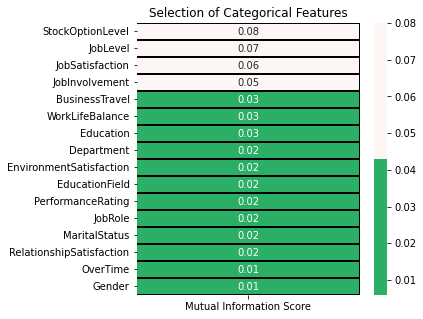

In [ ]:
#Mutual Information Test:

features = x_train.loc[:,categorical_features]
target = pd.DataFrame(y_train)

best_features = SelectKBest(score_func = mutual_info_classif,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['Mutual Information Score']) 

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'Mutual Information Score'),annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Categorical Features');

In [ ]:
'''Mutual Information Score of Attrition with categorical features display very low scores.
According to the above scores, none of the features should be selected for modeling.'''

'Mutual Information Score of Attrition with categorical features display very low scores.\nAccording to the above scores, none of the features should be selected for modeling.'

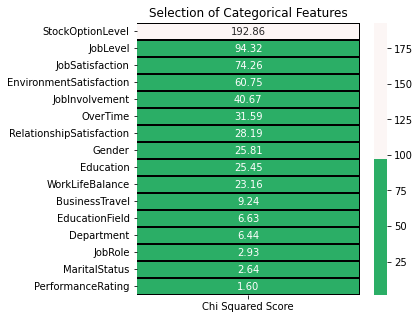

In [ ]:
# Chi Square test:

features = x_train.loc[:,categorical_features]
target = pd.DataFrame(y_train)

best_features = SelectKBest(score_func = chi2,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['Chi Squared Score']) 

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'Chi Squared Score'),annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Categorical Features');



In [ ]:
'''From the above Chi Squared Score Test, we will drop the following features : PerformanceRating, Department, JobRole, EducationField, BusinessTravel, MaritalStatus & Gender.'''

'From the above Chi Squared Score Test, we will drop the following features : PerformanceRating, Department, JobRole, EducationField, BusinessTravel, MaritalStatus & Gender.'

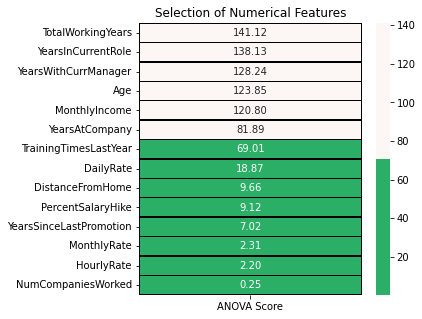

In [ ]:
# Fature selection for Numerical Features
#ANOVA Test:

from sklearn.feature_selection import f_classif

features = x_train.loc[:,discrete_features]
target = pd.DataFrame(y_train)

best_features = SelectKBest(score_func = f_classif,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['ANOVA Score']) 

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'ANOVA Score'),annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Numerical Features');

In [ ]:
'''From the above ANOVA Score Test, we will drop the following features : MonthlyRate, HourlyRate, NumCompaniesWorked, PercentSalaryHike, YearsSinceLastPromotion, DistanceFromHome & DailyRate.
We ready the datasets for data scaling by dropping the features based on the above statistical tests.'''

'From the above ANOVA Score Test, we will drop the following features : MonthlyRate, HourlyRate, NumCompaniesWorked, PercentSalaryHike, YearsSinceLastPromotion, DistanceFromHome & DailyRate.\nWe ready the datasets for data scaling by dropping the features based on the above statistical tests.'

In [ ]:
x_train = x_train.drop(columns = ['MonthlyRate', 'HourlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 
                                  'YearsSinceLastPromotion', 'DistanceFromHome','DailyRate',
                                  'PerformanceRating', 'Department', 'JobRole', 'EducationField', 
                                  'BusinessTravel', 'MaritalStatus' ,'Gender'])

x_test = x_test.drop(columns = ['MonthlyRate', 'HourlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 
                                  'YearsSinceLastPromotion', 'DistanceFromHome','DailyRate',
                                  'PerformanceRating', 'Department', 'JobRole', 'EducationField', 
                                  'BusinessTravel', 'MaritalStatus' ,'Gender'])

In [ ]:
#Data Scaling
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms = MinMaxScaler() # Normalization
ss = StandardScaler() # Standardization

# Normalization
x_train['MonthlyIncome'] = mms.fit_transform(x_train[['MonthlyIncome']]); x_test['MonthlyIncome'] = mms.transform(x_test[['MonthlyIncome']])
x_train['TotalWorkingYears'] = mms.fit_transform(x_train[['TotalWorkingYears']]); x_test['TotalWorkingYears'] = mms.transform(x_test[['TotalWorkingYears']])
x_train['YearsAtCompany'] = mms.fit_transform(x_train[['YearsAtCompany']]); x_test['YearsAtCompany'] = mms.transform(x_test[['YearsAtCompany']])
x_train['YearsInCurrentRole'] = mms.fit_transform(x_train[['YearsInCurrentRole']]); x_test['YearsInCurrentRole'] = mms.transform(x_test[['YearsInCurrentRole']])
x_train['YearsWithCurrManager'] = mms.fit_transform(x_train[['YearsWithCurrManager']]); x_test['YearsWithCurrManager'] = mms.transform(x_test[['YearsWithCurrManager']])

# Standardization
x_train['Age'] = ss.fit_transform(x_train[['Age']]); x_test['Age'] = ss.transform(x_test[['Age']])
x_train['Education'] = ss.fit_transform(x_train[['Education']]); x_test['Education'] = ss.transform(x_test[['Education']])
x_train['EnvironmentSatisfaction'] = ss.fit_transform(x_train[['EnvironmentSatisfaction']]); x_test['EnvironmentSatisfaction'] = ss.transform(x_test[['EnvironmentSatisfaction']])
x_train['JobInvolvement'] = ss.fit_transform(x_train[['JobInvolvement']]); x_test['JobInvolvement'] = ss.transform(x_test[['JobInvolvement']])
x_train['JobLevel'] = ss.fit_transform(x_train[['JobLevel']]); x_test['JobLevel'] = ss.transform(x_test[['JobLevel']])
x_train['JobSatisfaction'] = ss.fit_transform(x_train[['JobSatisfaction']]); x_test['JobSatisfaction'] = ss.transform(x_test[['JobSatisfaction']])
x_train['OverTime'] = ss.fit_transform(x_train[['OverTime']]); x_test['OverTime'] = ss.transform(x_test[['OverTime']])
x_train['RelationshipSatisfaction'] = ss.fit_transform(x_train[['RelationshipSatisfaction']]); x_test['RelationshipSatisfaction'] = ss.transform(x_test[['RelationshipSatisfaction']])
x_train['StockOptionLevel'] = ss.fit_transform(x_train[['StockOptionLevel']]); x_test['StockOptionLevel'] = ss.transform(x_test[['StockOptionLevel']])
x_train['TrainingTimesLastYear'] = ss.fit_transform(x_train[['TrainingTimesLastYear']]); x_test['TrainingTimesLastYear'] = ss.transform(x_test[['TrainingTimesLastYear']])
x_train['WorkLifeBalance'] = ss.fit_transform(x_train[['WorkLifeBalance']]); x_test['WorkLifeBalance'] = ss.transform(x_test[['WorkLifeBalance']])


In [ ]:
'''Machine learning model does not understand the units of the values of the features. It treats the input just as a simple number but does not understand the true meaning of that value. Thus, it becomes necessary to scale the data.

We have 2 options for data scaling :

1) Normalization

2) Standardization.

As most of the algorithms assume the data to be normally (Gaussian) distributed, Normalization is done for features whose data does not display normal distribution and standardization is carried out for features that are normally distributed but the range of values is huge or small as compared to other features.

From the above transformation, we fit the data on the training data and transform the test data from information based on the training data. If we check the formulas of the Normalization & Standardization, we use mean, standard deviation, min & max values.

Thus if these above statistical parameters are calculated using the complete dataset, then we are sharing the values from the to-be test data and thus sharing this to-be test data with the training data and cause Data Leakage.'''

'Machine learning model does not understand the units of the values of the features. It treats the input just as a simple number but does not understand the true meaning of that value. Thus, it becomes necessary to scale the data.\n\nWe have 2 options for data scaling :\n\n1) Normalization\n\n2) Standardization.\n\nAs most of the algorithms assume the data to be normally (Gaussian) distributed, Normalization is done for features whose data does not display normal distribution and standardization is carried out for features that are normally distributed but the range of values is huge or small as compared to other features.\n\nFrom the above transformation, we fit the data on the training data and transform the test data from information based on the training data. If we check the formulas of the Normalization & Standardization, we use mean, standard deviation, min & max values.\n\nThus if these above statistical parameters are calculated using the complete dataset, then we are sharing 

In [ ]:
#Modelling

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve

In [ ]:
#Selecting the features from the above conducted tests and splitting the data into 85 - 15 train - test groups.

In [ ]:
def model(classifier,x_train,y_train,x_test,y_test):
    
    classifier.fit(x_train,y_train)
    prediction = classifier.predict(x_test)
    cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
    print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(classifier,x_train,y_train,cv = cv,scoring = 'roc_auc').mean()))
    print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test,prediction)))
    plot_roc_curve(classifier, x_test,y_test)
    plt.title('ROC_AUC_Plot')
    plt.show()

def model_evaluation(classifier,x_test,y_test):
    
    # Confusion Matrix
    cm = confusion_matrix(y_test,classifier.predict(x_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = colors,fmt ='')
    
    # Classification Report
    print(classification_report(y_test,classifier.predict(x_test)))

In [ ]:
#XGBoost Classifier

from xgboost import XGBClassifier

In [ ]:
classifier_xgb = XGBClassifier(learning_rate= 0.01,max_depth = 3,n_estimators = 1000)

Cross Validation Score :  91.82%
ROC_AUC Score :  86.14%


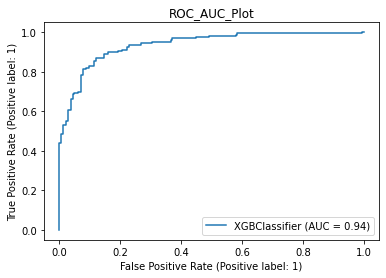

              precision    recall  f1-score   support

           0       0.86      0.89      0.87       183
           1       0.86      0.84      0.85       160

    accuracy                           0.86       343
   macro avg       0.86      0.86      0.86       343
weighted avg       0.86      0.86      0.86       343



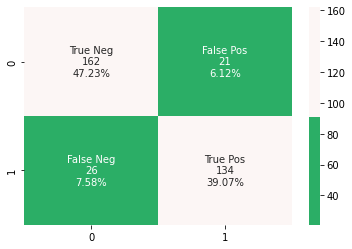

In [ ]:


















































model(classifier_xgb,x_train.values,y_train.values,x_test.values,y_test.values)
model_evaluation(classifier_xgb,x_test.values,y_test.values)

In [ ]:
# LGBM Classifier
from lightgbm import LGBMClassifier


In [ ]:
classifier_lgbm = LGBMClassifier(learning_rate= 0.01,max_depth = 3,n_estimators = 1000)

Cross Validation Score :  91.96%
ROC_AUC Score :  86.96%


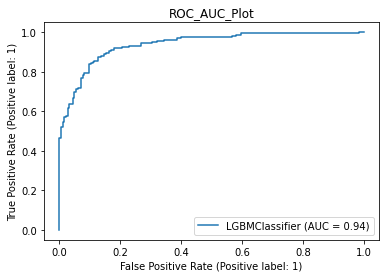

              precision    recall  f1-score   support

           0       0.86      0.90      0.88       183
           1       0.88      0.84      0.86       160

    accuracy                           0.87       343
   macro avg       0.87      0.87      0.87       343
weighted avg       0.87      0.87      0.87       343



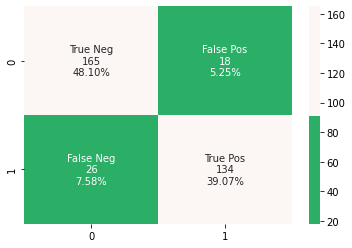

In [ ]:
model(classifier_lgbm,x_train.values,y_train.values,x_test.values,y_test.values)
model_evaluation(classifier_lgbm,x_test.values,y_test.values)

In [ ]:
# Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier


In [ ]:
classifier_dt = DecisionTreeClassifier(random_state = 1000,max_depth = 4,min_samples_leaf = 1)

Cross Validation Score :  80.09%
ROC_AUC Score :  75.05%


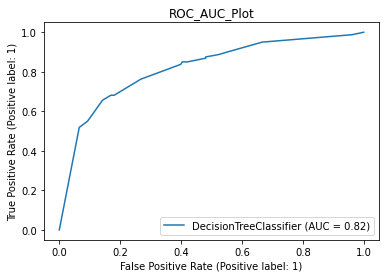

              precision    recall  f1-score   support

           0       0.75      0.82      0.78       183
           1       0.77      0.68      0.72       160

    accuracy                           0.76       343
   macro avg       0.76      0.75      0.75       343
weighted avg       0.76      0.76      0.75       343



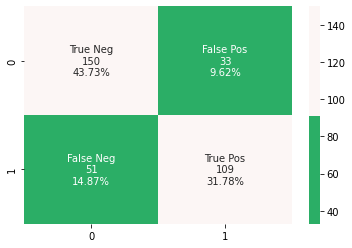

In [ ]:
model(classifier_dt,x_train.values,y_train.values,x_test.values,y_test.values)
model_evaluation(classifier_dt,x_test.values,y_test.values)

In [ ]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier


In [ ]:
classifier_rf = RandomForestClassifier(max_depth = 4,random_state = 0)

Cross Validation Score :  87.32%
ROC_AUC Score :  79.69%


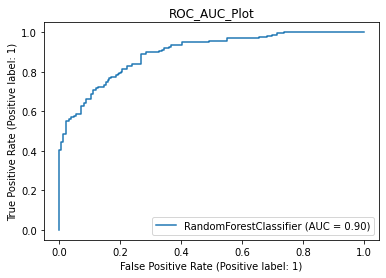

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       183
           1       0.83      0.72      0.77       160

    accuracy                           0.80       343
   macro avg       0.81      0.80      0.80       343
weighted avg       0.80      0.80      0.80       343



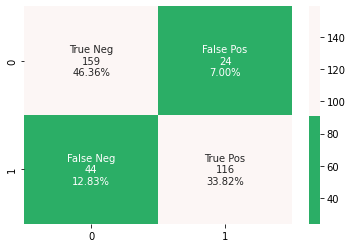

In [ ]:
model(classifier_rf,x_train.values,y_train.values,x_test.values,y_test.values)
model_evaluation(classifier_rf,x_test.values,y_test.values)

In [ ]:
'''conclusion
This is an extensive & huge dataset that poses the problem of binary classification with multiple text and numerical features that are categorical & discrete in nature.
This is another imbalanced dataset that needs to be dealt using SMOTE analysis. It provides us an with a plethora of opportunities to work on EDA using visualizations to gain insights. Grouping the features together is key!
We also aim to make the models robust by solving the Data Leakage problem. Model performances are good as well. It also gives us to chances to learn about varied code optimization techniques as well.'''

'conclusion\nThis is an extensive & huge dataset that poses the problem of binary classification with multiple text and numerical features that are categorical & discrete in nature.\nThis is another imbalanced dataset that needs to be dealt using SMOTE analysis. It provides us an with a plethora of opportunities to work on EDA using visualizations to gain insights. Grouping the features together is key!\nWe also aim to make the models robust by solving the Data Leakage problem. Model performances are good as well. It also gives us to chances to learn about varied code optimization techniques as well.'